<a href="https://colab.research.google.com/github/andrewkallai/MLTSA25_AKallai/blob/main/HW3/ARIMA_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section
Jacklyn Clauss completed Data Ingestions, including setting up kaggle to obtain the stock information used. Dayanara Yanez completed Data Exploration and all the figures with accompanying captions in the section, outlining the characteristics of the stock data. Skyler Lindsey completed testing each time series for stationarity and obtaining all the partial autocorrelation plots, along with helping to decide what stationarity values to use for fitting the ARIMA models. Yuca Chen fit an ARIMA model to each time series and decided the p-value to use from the produced autocorrelation plots, and completed all the figures with accompanying captions.



Task List:
1.   Data Ingestions - Jacklyn
2.   Data Exploration - Daya
3.   Test each time series for stationarity - Skyler
4.   Inspect the Partial Autocorrelation with Plots - Skyler
5.   Fit an ARIMA Model to Each Time Series with Appropriate Parameters - Yuca


In [49]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [50]:
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import json
import os

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

TASK 1: data ingestion

TASK 2: data exploration

TASK 3: test each time series for stationarity

TASK 4: Inspect the partial autocorrelation with plots

TASK 5: fit an ARIMA model to each time series with appriopriate parameters

# REMEMBER: CAPTIONS FOR EVERY PLOT!!!

#  TASK 1: data ingestion

In [53]:
# download kaggle economic data
# https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data#a.us.txt


In [54]:
!pip install kaggle

In [55]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [56]:
cd /content/gdrive/MyDrive/.kaggle

/content/gdrive/MyDrive/.kaggle


In [57]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']


## now make a director to save the MLTSA 2025 data into - call it MLTSA25

In [58]:
!mkdir /content/gdrive/MyDrive/MLTSA25

mkdir: cannot create directory ‘/content/gdrive/MyDrive/MLTSA25’: File exists


In [59]:
cd /content/gdrive/MyDrive/MLTSA25

/content/gdrive/MyDrive/MLTSA25


## make a HW3 folder

In [60]:
!mkdir HW3

mkdir: cannot create directory ‘HW3’: File exists


In [61]:
cd HW3

/content/gdrive/MyDrive/MLTSA25/HW3


## download the kaggle data _note: you may need to go to the specificl challenge and agree to the terms of competition_

In [62]:
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs

Dataset URL: https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs
License(s): CC0-1.0
price-volume-data-for-all-us-stocks-etfs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [63]:
!ls

Data  ETFs  price-volume-data-for-all-us-stocks-etfs.zip  Stocks


## uncompress the file

In [64]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip

Archive:  price-volume-data-for-all-us-stocks-etfs.zip
replace Data/ETFs/aadr.us.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace Data/ETFs/aaxj.us.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [65]:
# use glob to sort the files alphabetically
alltss = []

allfiles = np.sort(np.array(glob.glob("Data/Stocks/*.txt")))
tss = pd.read_csv(allfiles[0])[["Date", "Close"]].rename({"Close":
              allfiles[0].replace(".txt",
                                  "").replace("Data/Stocks/",
                                              "")}, axis=1)
for f in allfiles[1:11]:
    print(f)
    name = f.replace(".txt","").replace("Data/Stocks/", "")

    tss = tss.merge(pd.read_csv(f)[["Date", "Close"]].rename({"Close":
                                                              name},
                                        axis=1), on="Date")
tss.set_index("Date", inplace=True)


Data/Stocks/aa.us.txt
Data/Stocks/aaap.us.txt
Data/Stocks/aaba.us.txt
Data/Stocks/aac.us.txt
Data/Stocks/aal.us.txt
Data/Stocks/aamc.us.txt
Data/Stocks/aame.us.txt
Data/Stocks/aan.us.txt
Data/Stocks/aaoi.us.txt
Data/Stocks/aaon.us.txt


Now you have a dataframe with 10 columns of data and two years of measurements

# TASK 2:  data exploration

- inspect the files by, e.g., printing some content and printing their statistical properties
- plot each time series (ts)
- inspect correlation

In [66]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
print(tss.head())


              a.us   aa.us  aaap.us  aaba.us  aac.us  aal.us  aamc.us  \
Date                                                                    
2015-11-11  36.901  17.779    24.50    33.38   22.56  43.524    20.75   
2015-11-12  36.734  17.206    25.00    33.23   22.50  43.044    19.17   
2015-11-13  36.030  17.581    25.26    32.19   22.68  42.603    17.50   
2015-11-16  36.577  18.242    25.02    32.94   22.58  41.994    15.58   
2015-11-17  37.607  18.197    24.62    32.86   22.52  41.473    12.59   

            aame.us  aan.us  aaoi.us  aaon.us  
Date                                           
2015-11-11   4.7960  24.649    16.76   24.252  
2015-11-12   4.8951  24.182    16.11   23.652  
2015-11-13   4.6672  23.795    16.60   23.110  
2015-11-16   4.8455  23.923    16.93   23.130  
2015-11-17   4.9150  23.418    16.68   23.268  


In [68]:
print(tss.describe())

             a.us       aa.us     aaap.us     aaba.us      aac.us      aal.us  \
count  447.000000  447.000000  447.000000  447.000000  447.000000  447.000000   
mean    48.787649   28.434510   36.750649   44.218737   13.871387   41.942794   
std      9.034588    8.818682   10.642928   10.756682    6.071919    6.066181   
min     34.193000   14.831000   23.720000   26.760000    6.050000   24.916000   
25%     41.239500   20.950000   29.720000   36.660000    8.040000   37.982500   
50%     46.228000   28.080000   35.020000   42.080000   11.400000   42.059000   
75%     55.956500   34.595000   38.525000   49.640000   19.600000   46.530000   
max     68.370000   50.080000   81.000000   72.220000   24.720000   53.992000   

          aamc.us     aame.us      aan.us     aaoi.us     aaon.us  
count  447.000000  447.000000  447.000000  447.000000  447.000000  
mean    45.783325    3.875367   29.626879   33.240678   30.040465  
std     31.608792    0.432411    7.248519   22.352541    5.021530 

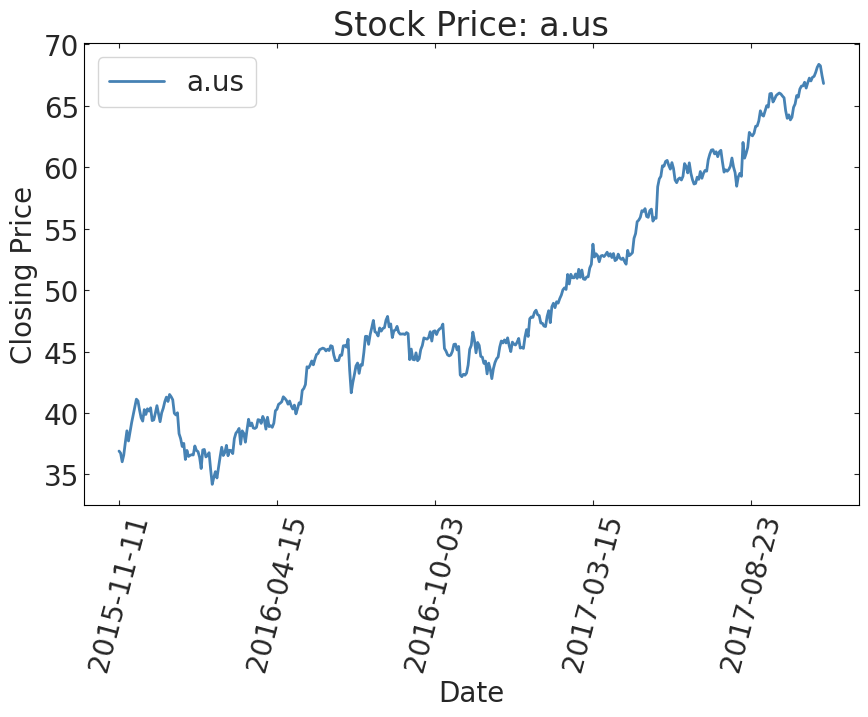

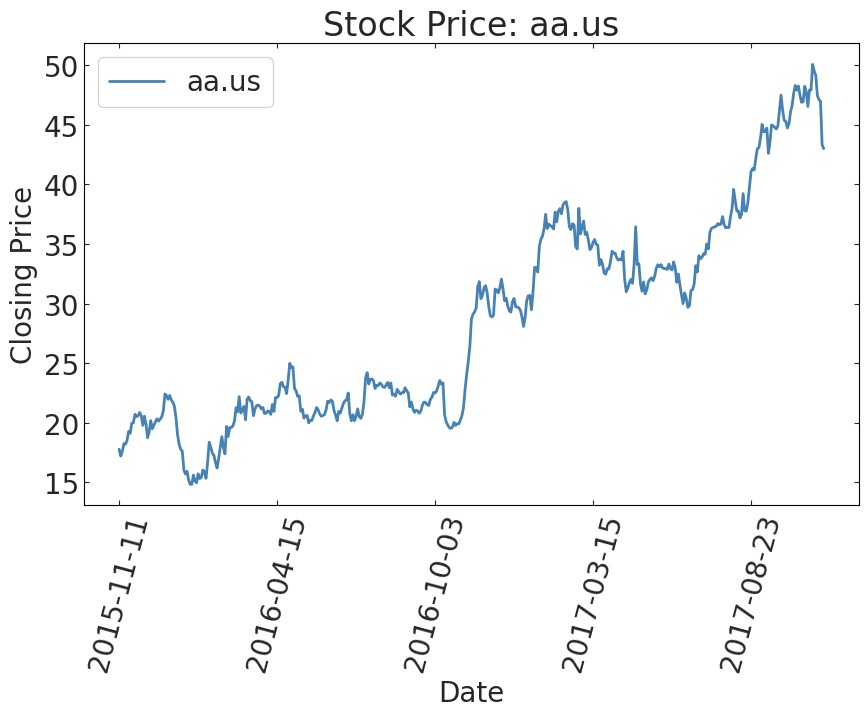

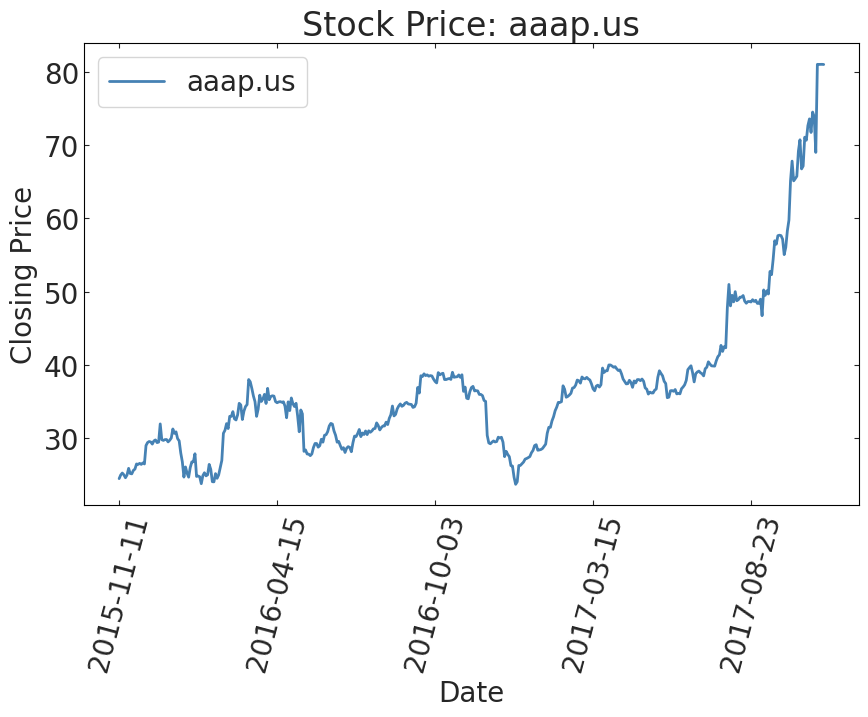

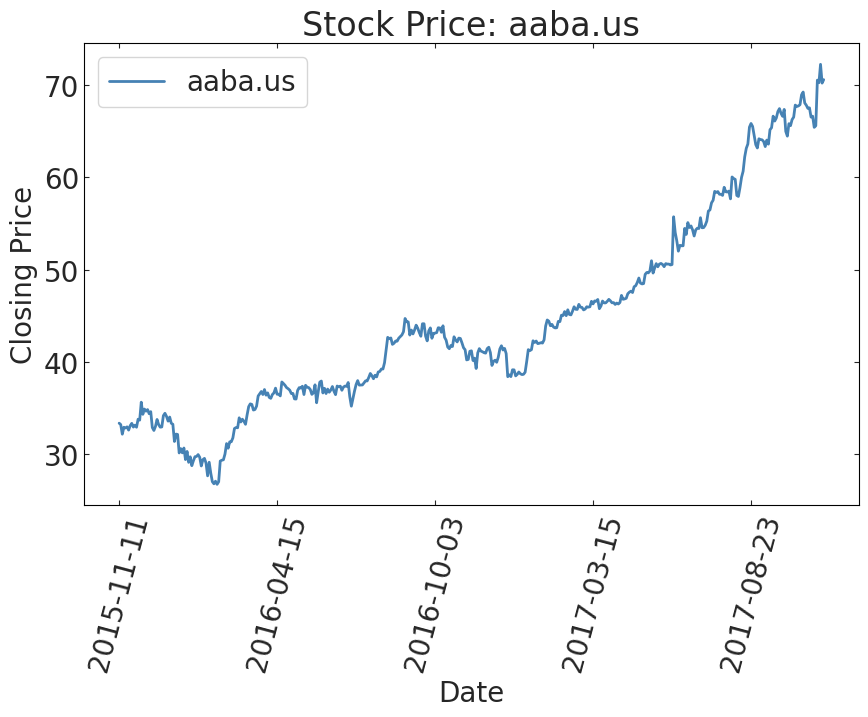

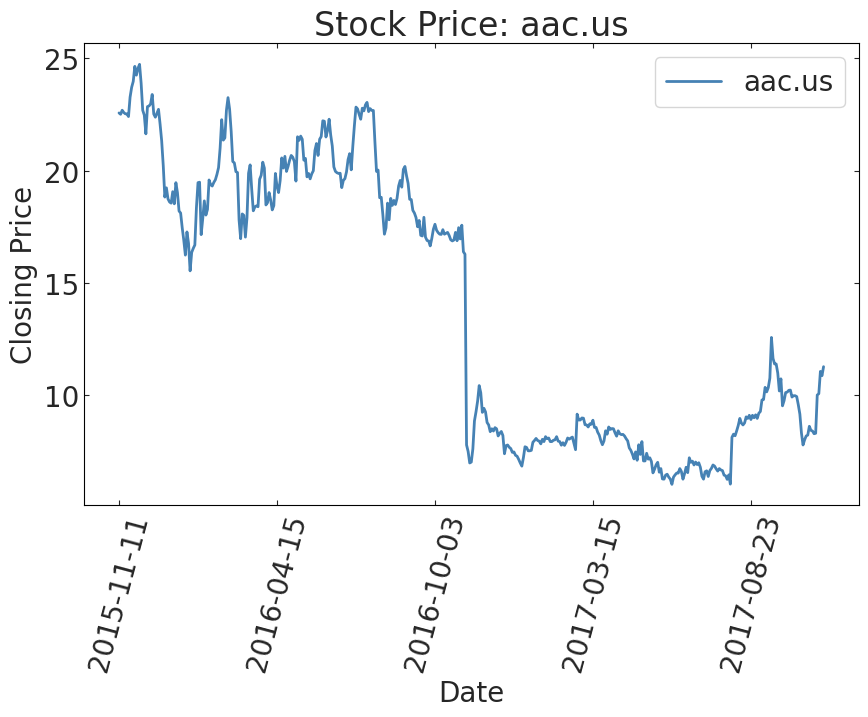

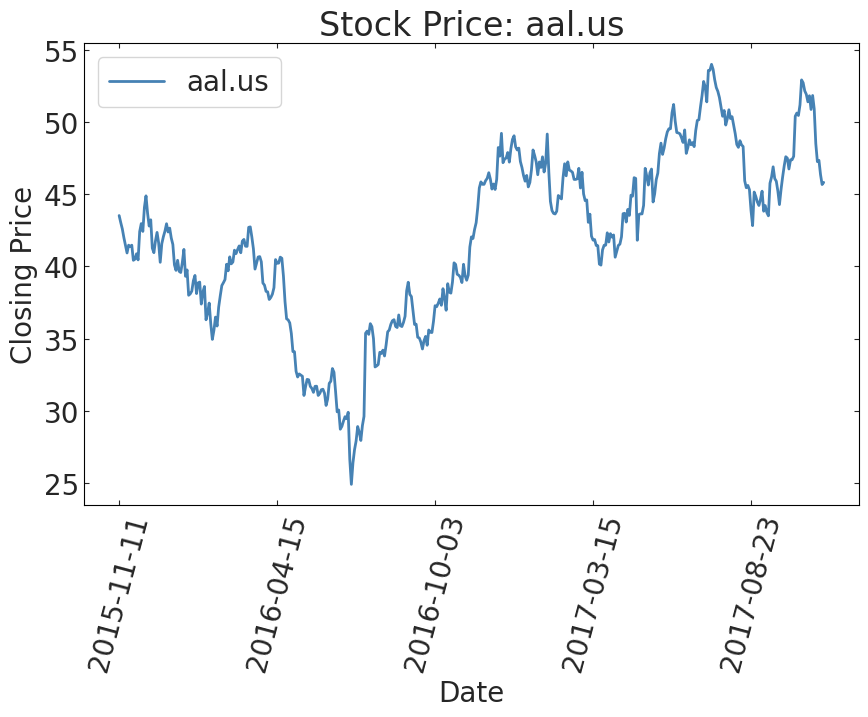

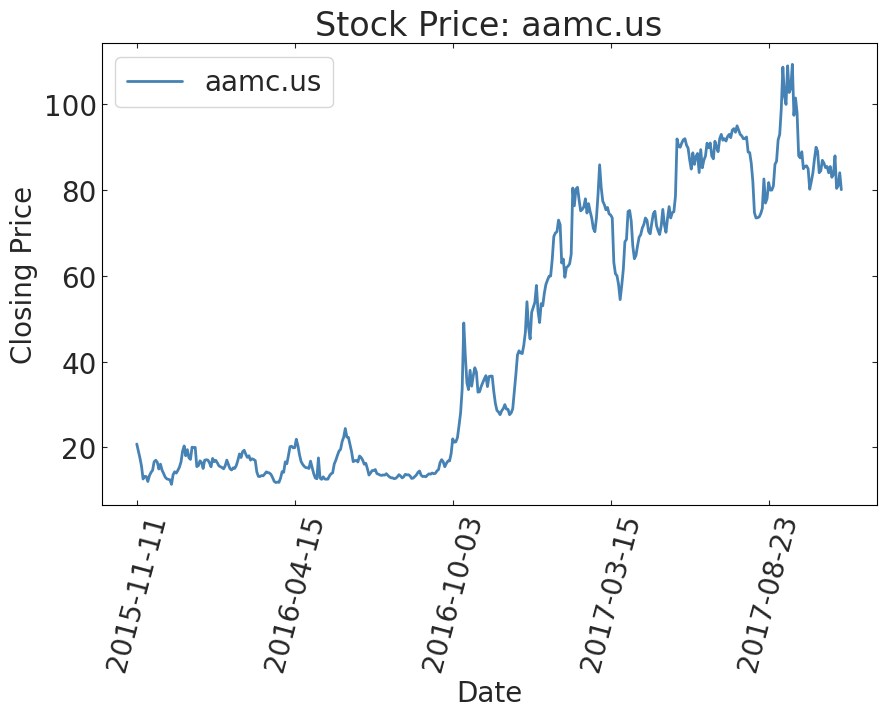

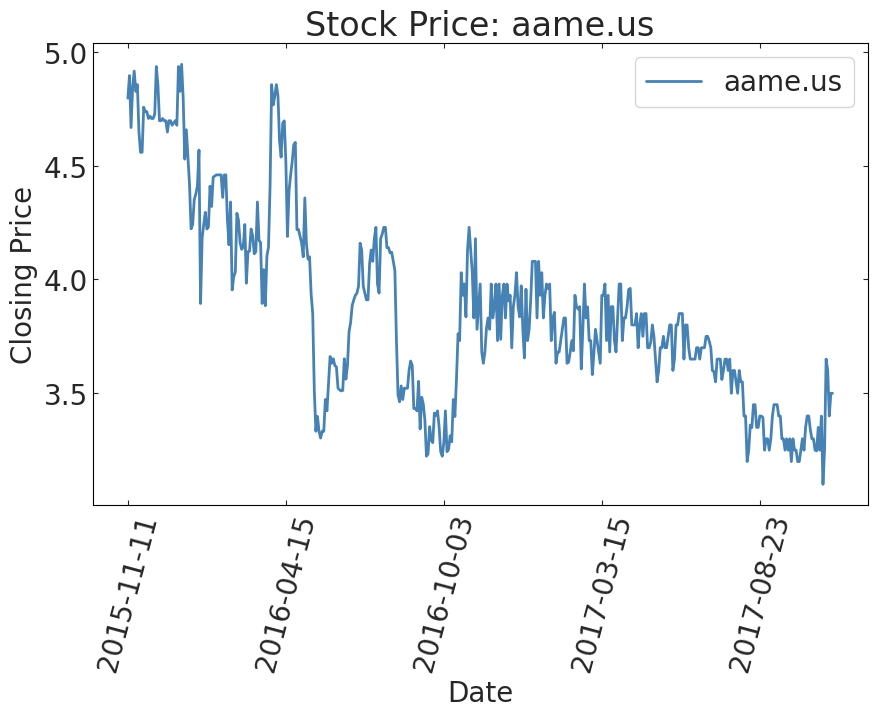

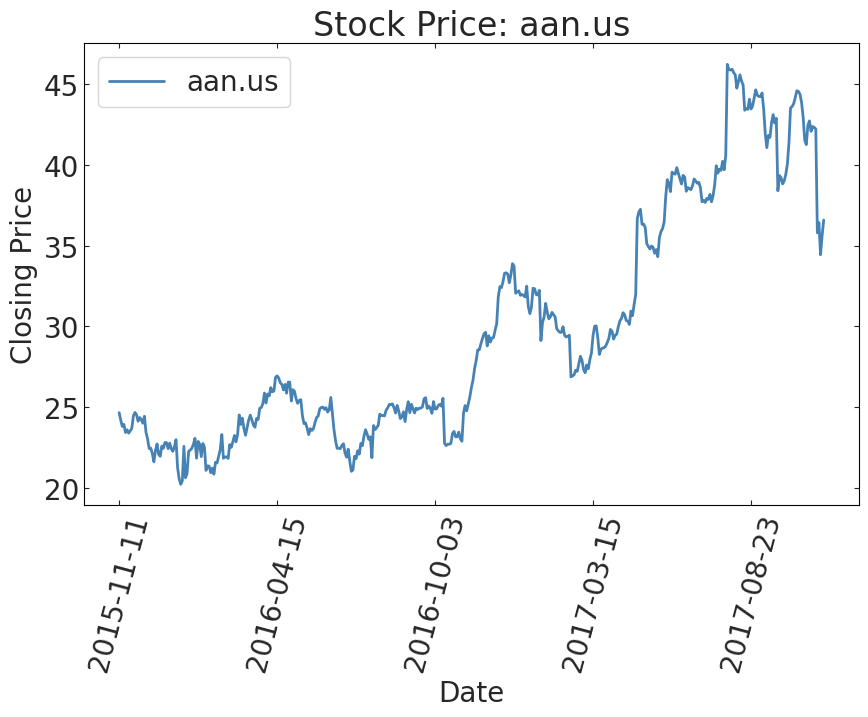

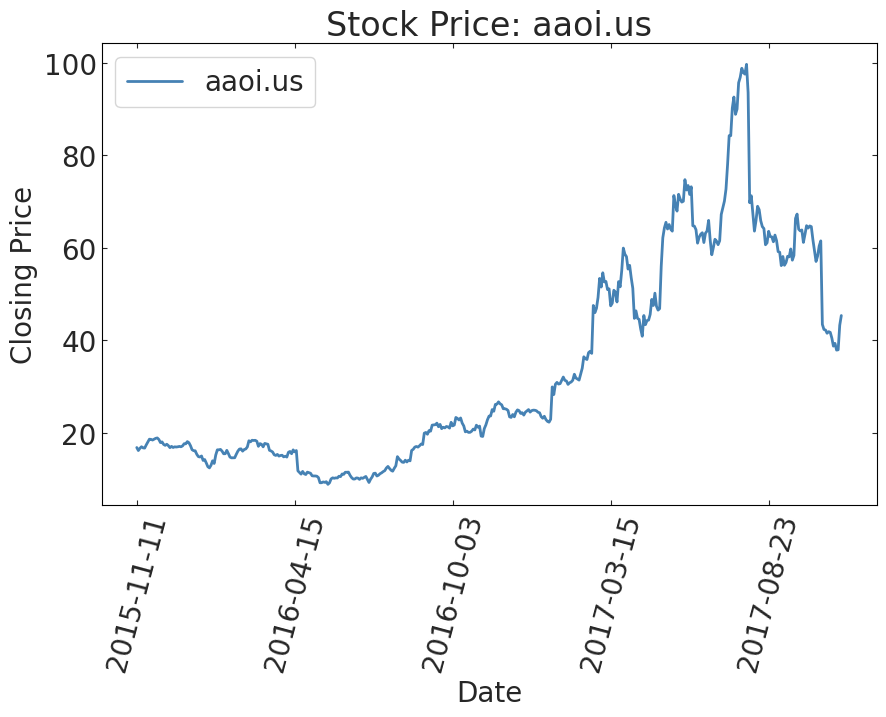

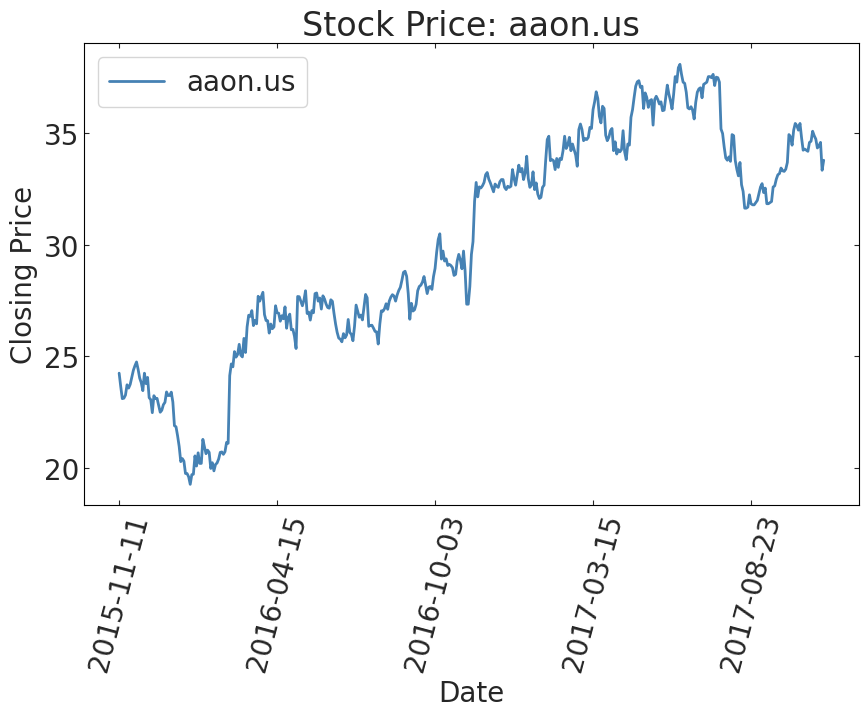

In [69]:
# plot all 10, for example in a for loop
# example of one plot - there are other ways to do it of course!

for column in tss.columns:
    tss.plot(y=column, rot=75, lw=2, title=f"Stock Price: {column}")
    plt.ylabel("Closing Price")
    plt.xlabel("Date")
    plt.show()



**Fig** 1: This figures shows the historical fluctuations in each company's stock price. A specific stock's closing price is shown on each line. The stock's closing price is shown on the y-axis, while the date is shown on the x-axis. The title identifies the particular stock symbol (such as a.us). We can monitor general growth or decline as well as trends and oscillations thanks to the lines. Volatility patterns, possible breakout spots, and upward or negative trends are all readily apparent. Investors might use this to discover hazardous stocks or long-term growth prospects.

### visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

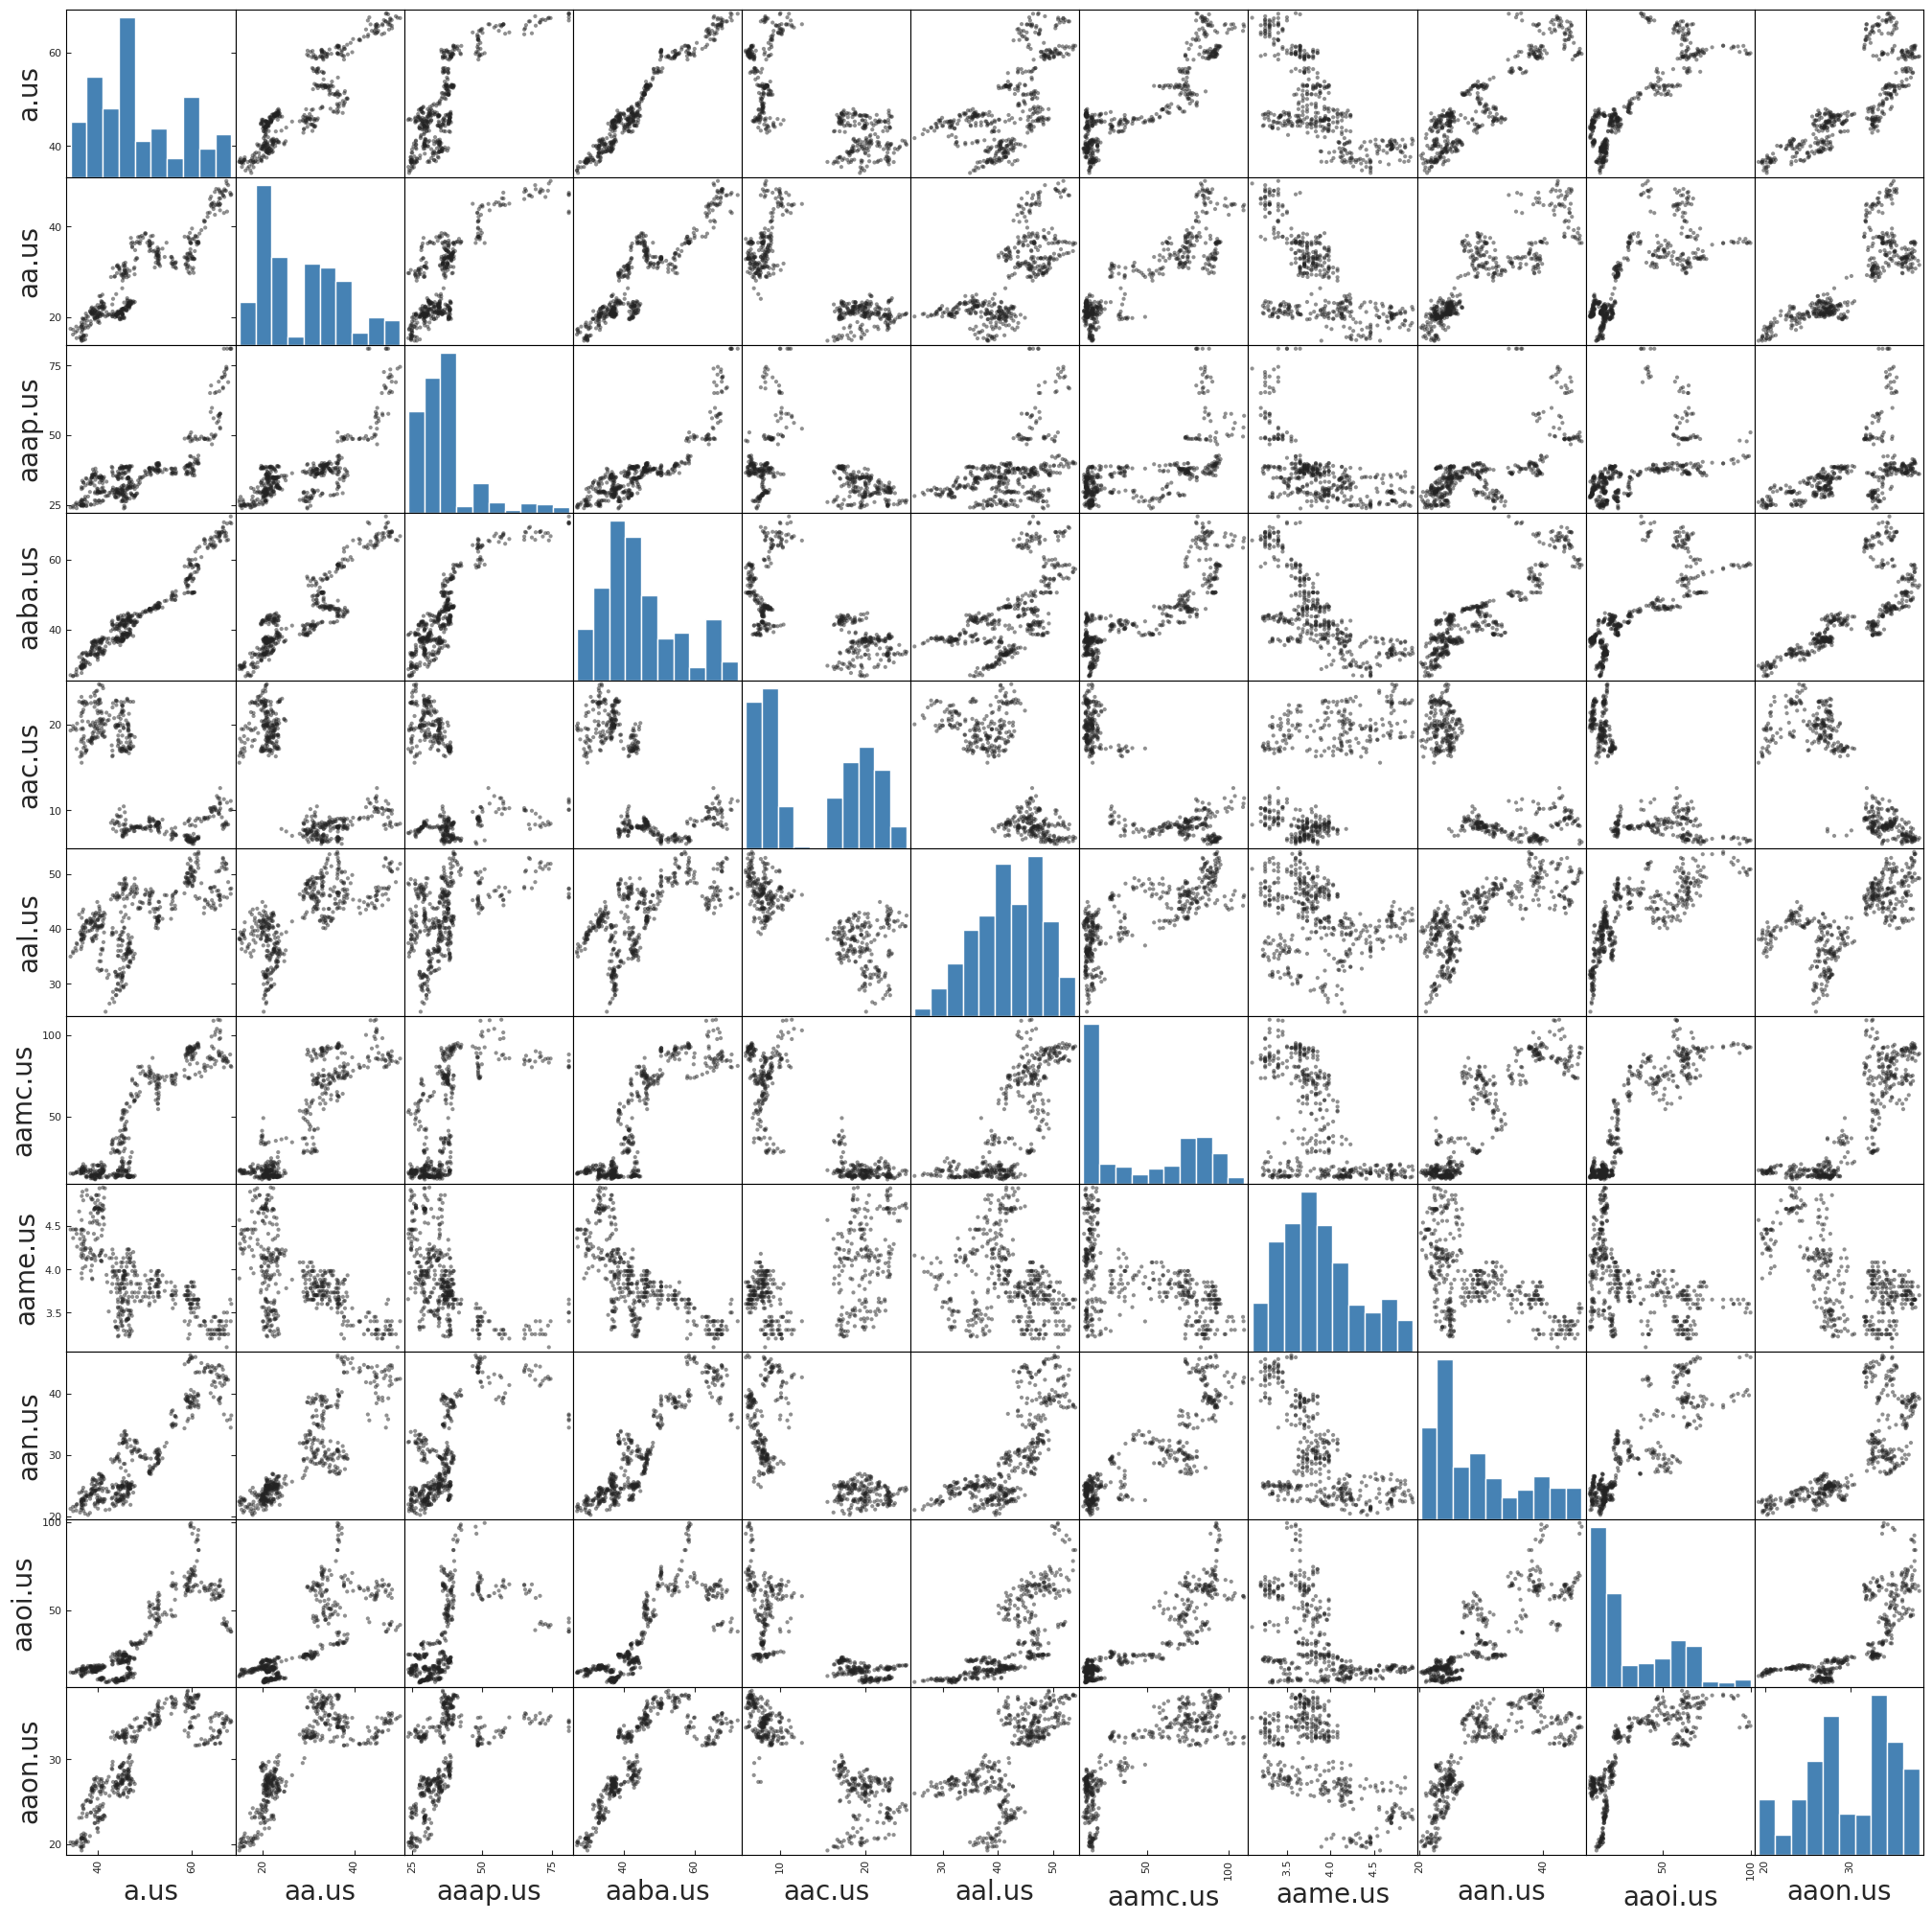

In [70]:
scatter_matrix(tss, figsize=(25,25), color="#222222");

Fig 2: This multi-dimensional visualization uses histograms and scatter plots to illustrate the correlations between several equities. The scatter plots display the correlation between each pair of stocks, and the diagonal histograms display the distribution of each stock's closing price. This storyline is an excellent tool for illustrating intricate relationship. By exposing hidden connections between stocks, it aids in the identification of clusters, trends, and possible trading techniques.

In [71]:
print("Correlation matrix of 2015-2017 stock values")
tss.corr()

Correlation matrix of 2015-2017 stock values


a.us     aa.us   aaap.us   aaba.us    aac.us    aal.us   aamc.us  \
a.us     1.000000  0.902139  0.800310  0.973457 -0.721867  0.621041  0.897263   
aa.us    0.902139  1.000000  0.776600  0.904210 -0.791137  0.713229  0.893952   
aaap.us  0.800310  0.776600  1.000000  0.872134 -0.423021  0.451520  0.621329   
aaba.us  0.973457  0.904210  0.872134  1.000000 -0.670578  0.612989  0.849972   
aac.us  -0.721867 -0.791137 -0.423021 -0.670578  1.000000 -0.785248 -0.868936   
aal.us   0.621041  0.713229  0.451520  0.612989 -0.785248  1.000000  0.780517   
aamc.us  0.897263  0.893952  0.621329  0.849972 -0.868936  0.780517  1.000000   
aame.us -0.699609 -0.606774 -0.573976 -0.709023  0.510986 -0.219258 -0.544740   
aan.us   0.905395  0.873520  0.696179  0.903785 -0.765267  0.756808  0.881631   
aaoi.us  0.851239  0.766459  0.560427  0.809059 -0.780147  0.746505  0.904166   
aaon.us  0.809409  0.809966  0.503524  0.755263 -0.876358  0.671816  0.853182   

          aame.us    aan.us   aaoi.us   aaon.us  
a.us    -0.699609  0.905395  0.851239  0.809409  
aa.us   -0.606774  0.873520  0.766459  0.809966  
aaap.us -0.573976  0.696179  0.560427  0.503524  
aaba.us -0.709023  0.903785  0.809059  0.755263  
aac.us   0.510986 -0.765267 -0.780147 -0.876358  
aal.us  -0.219258  0.756808  0.746505  0.671816  
aamc.us -0.544740  0.881631  0.904166  0.853182  
aame.us  1.000000 -0.585002 -0.496371 -0.612453  
aan.us  -0.585002  1.000000  0.860847  0.765596  
aaoi.us -0.496371  0.860847  1.000000  0.780400  
aaon.us -0.612453  0.765596  0.780400  1.000000

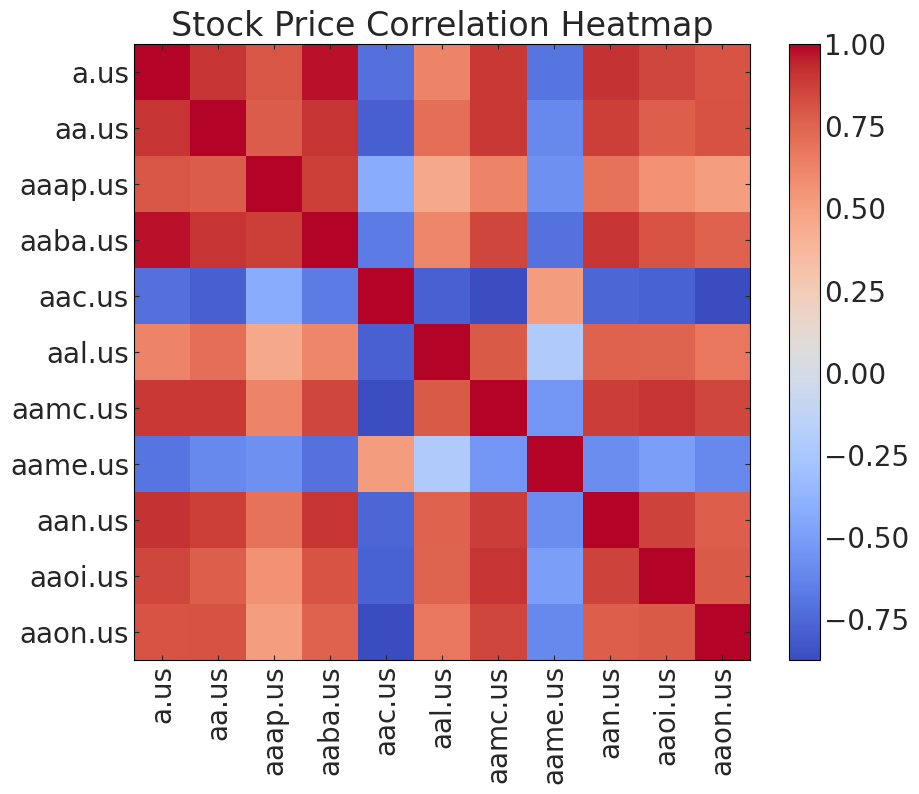

In [72]:
#Show the correlation as a heatmap

plt.figure(figsize=(10, 8))
plt.imshow(tss.corr(), cmap="coolwarm", interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(tss.columns)), tss.columns, rotation=90)
plt.yticks(range(len(tss.columns)), tss.columns)
plt.title("Stock Price Correlation Heatmap")
plt.show()

Fig 3: This heatmap helps determine whether stocks are strongly or weakly connected by seeing how several equities move in relation to one another. The correlation values are shown by the color scale, which goes from blue (negative correlation) to red (strong positive correlation). Which stocks are being compared are indicated by the stock symbols along the axes. By avoiding stocks that move in the same direction, investors may utilize this to diversify their holdings. Additionally, it shows which equities exhibit like behavior, which is helpful for strategic trading choices.

# TASK 3: test each time series for stationarity

## this will allow you to choose the parameter i in the ARIMA model: `i=0` for stationary time series, `i=1` for non stationary time series

The AD fuller test implementation which we saw in class is here
https://github.com/fedhere/MLTSA_FBianco/blob/main/CodeExamples/ARMA/testingARMA_ARIMA.ipynb

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using `statsmodels.api.tsa.stattools.adfuller()`

```
for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])
```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [73]:
significance_threshold = 0.05
stationary_list=[] #0 is false 1 is true
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for c in tss.columns:
  unittest = sm.tsa.stattools.adfuller(tss[c])
  print(c, unittest) # use the ADfuller test that we tried in class - that notebook is here  https://github.com/fedhere/MLTSA_FBianco/blob/main/CodeExamples/ARMA/testingARMA_ARIMA.ipynb
  print(f"statistics value: {unittest[0]}")
  print(f"p-value: {unittest[1]}")
  print(f"is p-value < {significance_threshold}? {unittest[1]<significance_threshold}")
  print(f"\nis there a unit test? {unittest[1]>=significance_threshold}")
  print(f"\nis it stationary? {unittest[1]<significance_threshold}")
  if unittest[1]<significance_threshold:
    stationary_list.append(1)
  else:
    stationary_list.append(0)

stationary_list

Stationarity results from the AD Fuller test at a p-value of 0.05
a.us (0.17979485746634596, 0.9711053061077951, 1, 445, {'1%': -3.4451307246616514, '5%': -2.86805689169311, '10%': -2.570241263729327}, 805.5248587554438)
statistics value: 0.17979485746634596
p-value: 0.9711053061077951
is p-value < 0.05? False

is there a unit test? True

is it stationary? False
aa.us (-0.6405303185574794, 0.8615583755460212, 0, 446, {'1%': -3.4450973903602367, '5%': -2.868042229965336, '10%': -2.570233448893}, 1045.624076312899)
statistics value: -0.6405303185574794
p-value: 0.8615583755460212
is p-value < 0.05? False

is there a unit test? True

is it stationary? False
aaap.us (2.6589712655309765, 0.9990837483738163, 10, 436, {'1%': -3.445437655635993, '5%': -2.8681918844944785, '10%': -2.5703132171113543}, 1398.3285551584795)
statistics value: 2.6589712655309765
p-value: 0.9990837483738163
is p-value < 0.05? False

is there a unit test? True

is it stationary? False
aaba.us (1.5446998318251526, 0.99

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

NOTE: keep track of which time series is stationary and which one is not - when you model with ARIMA you can set the second parameter to 0 if it is stationary

# TASK 4: Inspect the partial autocorrelation with plots -
## this will help you choose the value of the parameter p in the ARIMA model: `p=N` where N is the largest statistically significant lag in the partial autocorrelation


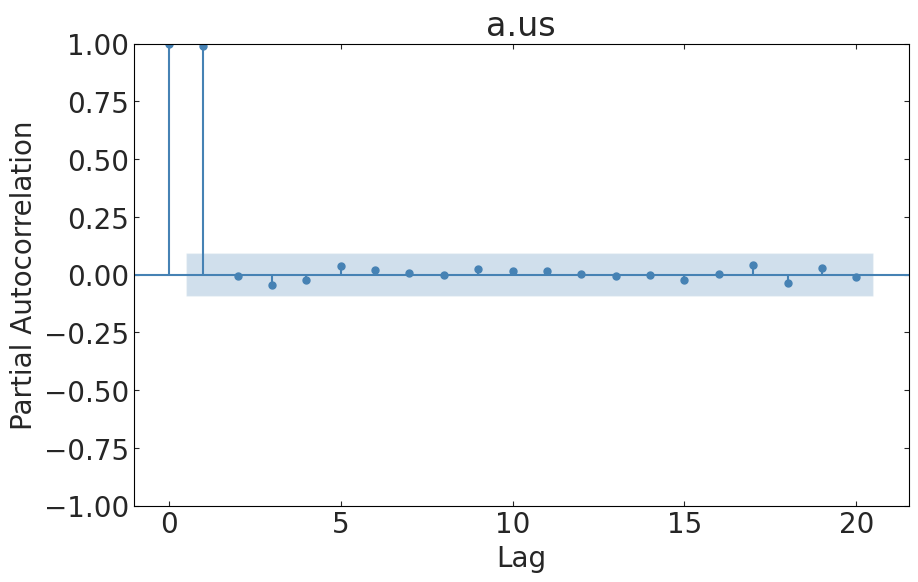

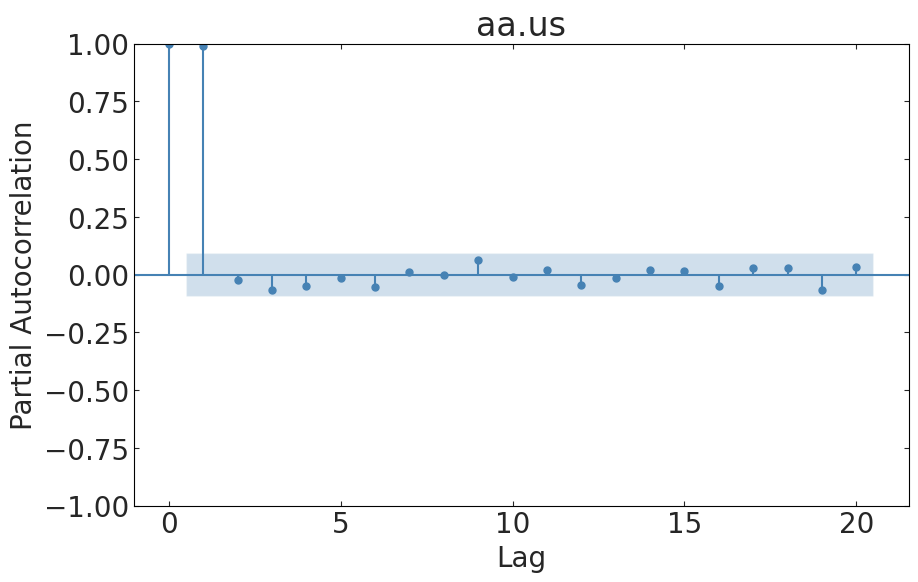

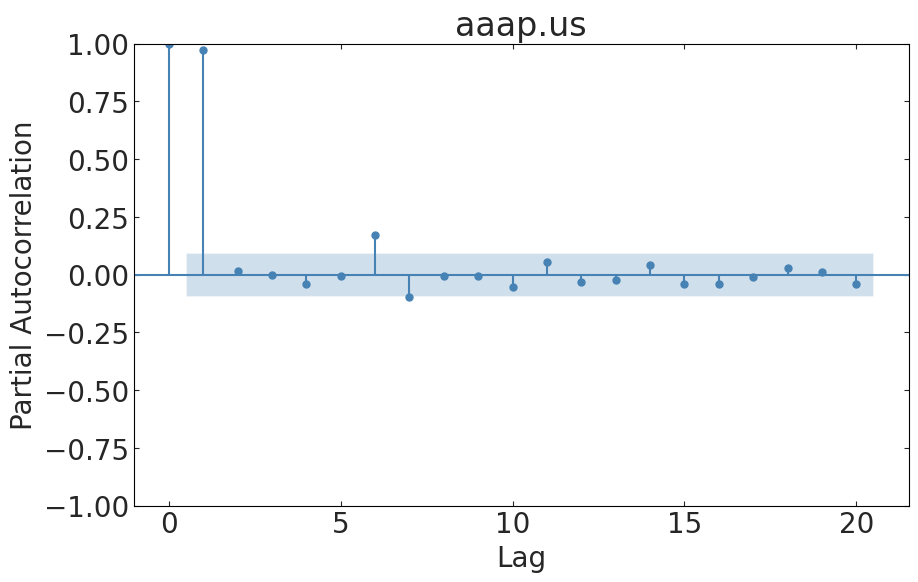

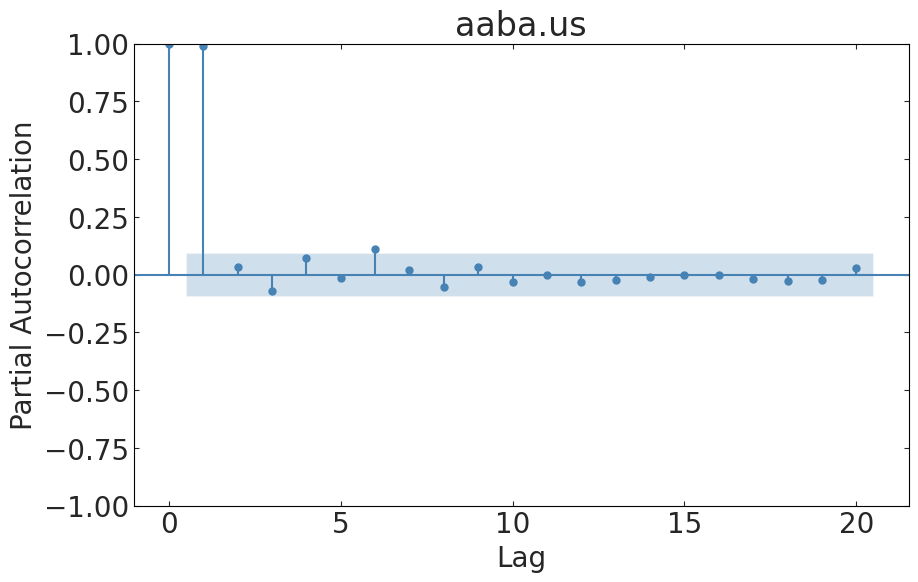

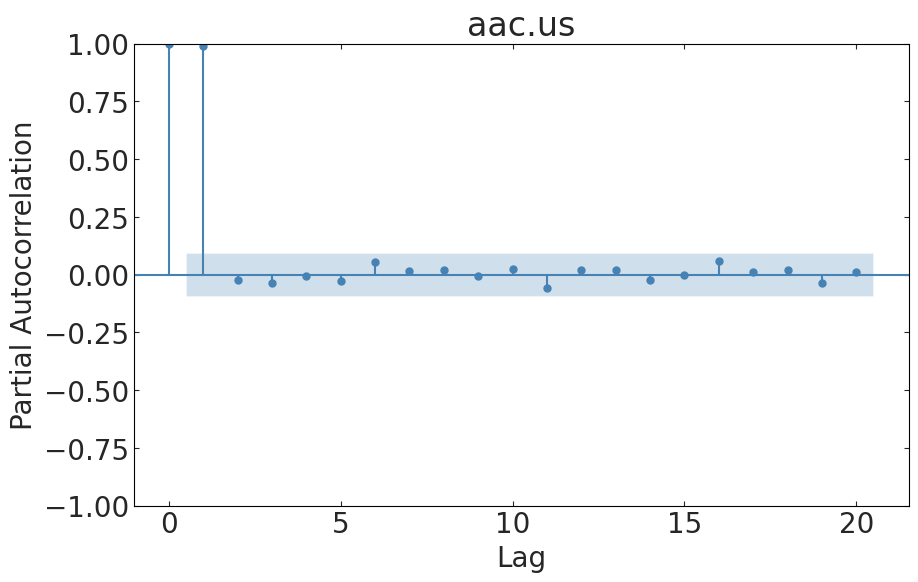

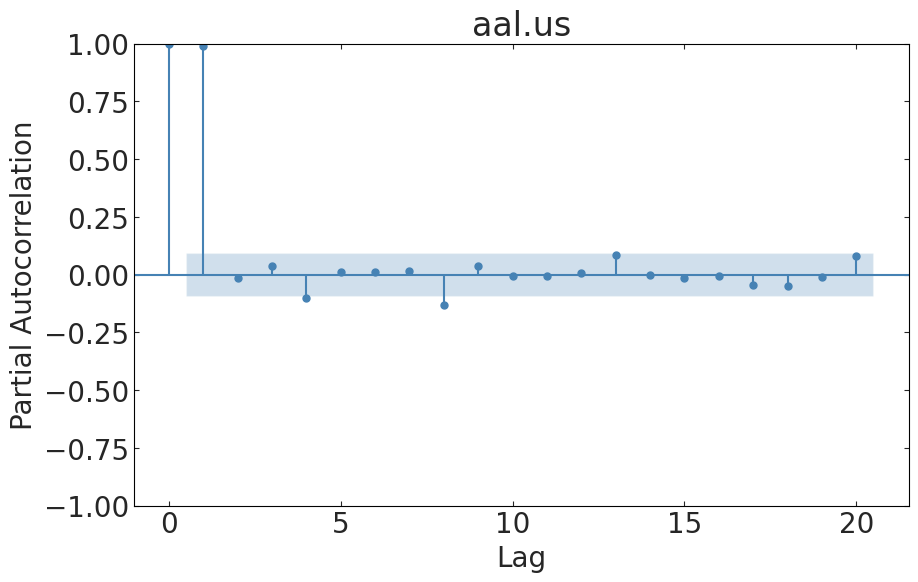

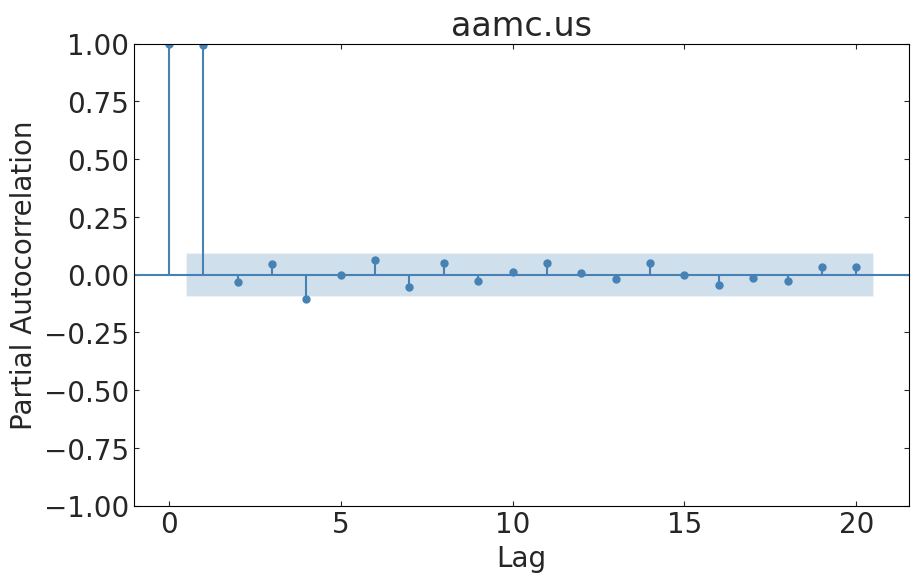

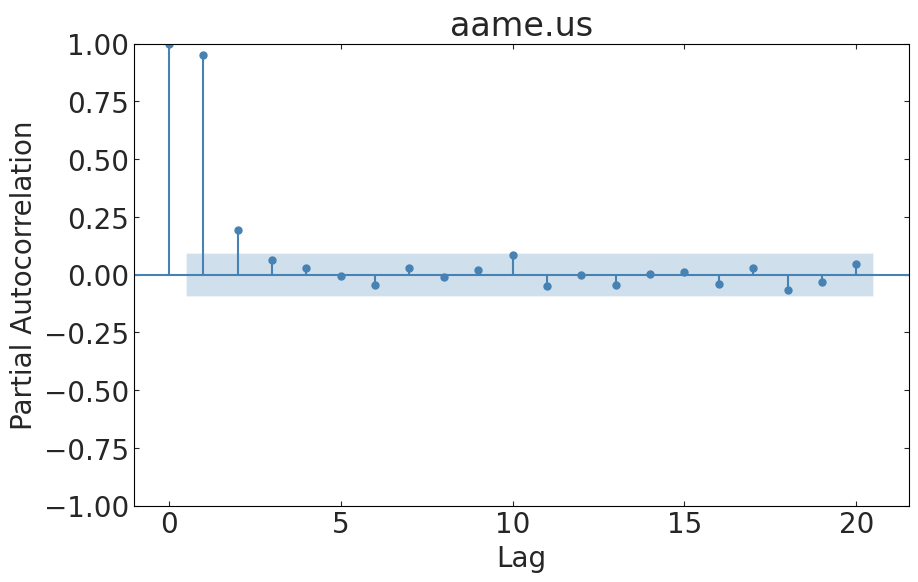

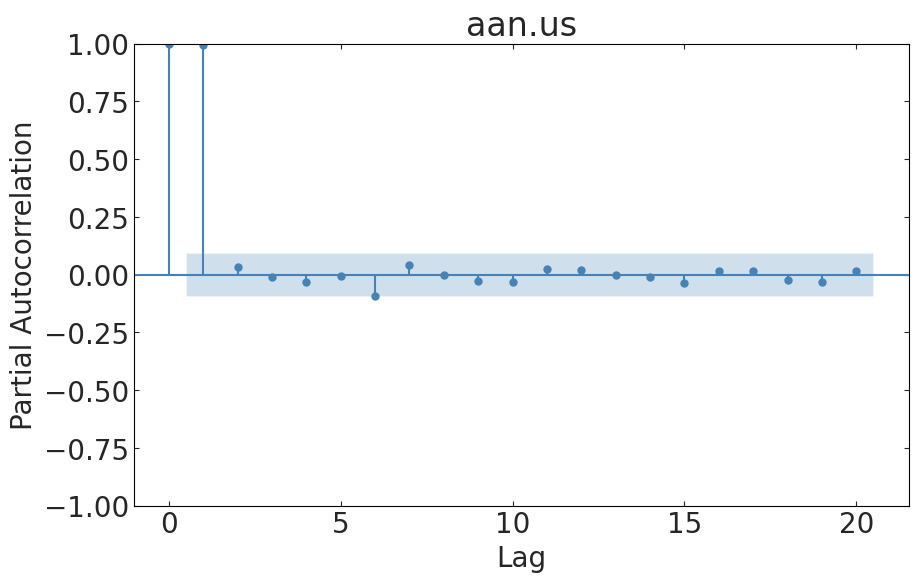

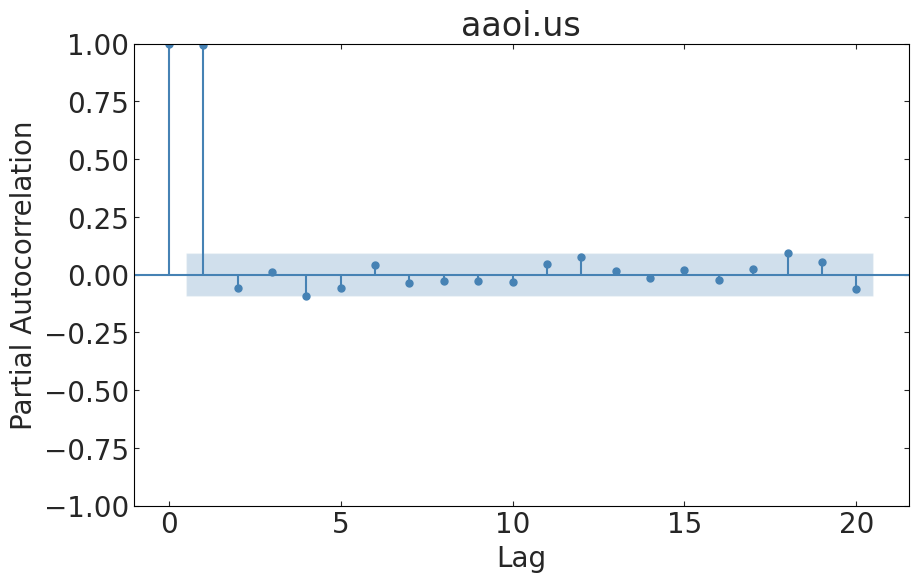

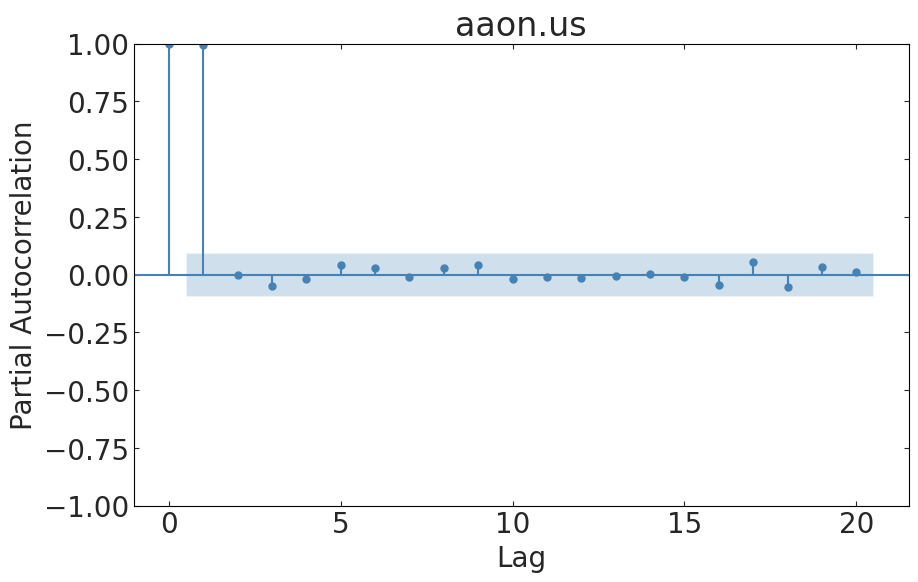

In [74]:
#partial autocorrelatin plot
maxlist=[]
for c in tss.columns:
  sm.graphics.tsa.plot_pacf(tss[c], lags=20);
  plt.title(c)
  plt.xlabel('Lag')
  plt.ylabel('Partial Autocorrelation')
  plt.show()

FIG 4: Partial autocorrelation function for each stock being analyzed. Lag is plotted on the horizontal axis and the partial autocorrelation coefficient is plotted on the vertical axis.

# TASK 5: fit an ARIMA model to each time series
- look here for how to use the statsmodels ARIMA function https://www.geeksforgeeks.org/arma-time-series-model/
- the ARIMA function has 3 parameters: (p,i,q) see slide https://slides.com/d/EfsBk3o/live#/12; choose the values of _p_ according to your pacf plot and _i_ according to your stationarity analysis. _q_ is harder to guess... pick whatever you want for now

For each time series, use the all but the last 60 points for training and show the prediction based on the last 60 points



In [75]:
# to run the model for 1 column:

column_name = "aal.us"
N_test = 60
p = 7
i = 1 # 1 - not stationary, 0 - stationary
q = 3

print("information for aal.us")
arma_model = sm.tsa.ARIMA(tss.iloc[:-60][column_name], order=(p, i, q))
model_fit = arma_model.fit()
model_fit.summary()


information for aal.us


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 aal.us   No. Observations:                  387
Model:                 ARIMA(7, 1, 3)   Log Likelihood                -507.269
Date:                Tue, 04 Mar 2025   AIC                           1036.538
Time:                        22:15:10   BIC                           1080.052
Sample:                             0   HQIC                          1053.794
                                - 387                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0204      0.063     -0.325      0.745      -0.143       0.102
ar.L2          0.0037      0.066      0.056      0.956      -0.126       0.133
ar.L3          1.0411      0.070     14.978      0.000       0.905       1.177
ar.L4         -0.0285      0.083     -0.344      0.731      -0.191       0.134
ar.L5          0.0430      0.059      0.726      0.468      -0.073       0.159
ar.L6         -0.1230      0.063     -1.955      0.051      -0.246       0.000
ar.L7          0.0587      0.063      0.928      0.353      -0.065       0.183
ma.L1          0.0244      1.545      0.016      0.987      -3.003       3.052
ma.L2         -0.0508      1.577     -0.032      0.974      -3.142       3.040
ma.L3         -0.9734      1.503     -0.648      0.517      -3.919       1.972
sigma2         0.8066      1.222      0.660      0.509      -1.588       3.201
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               484.04
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                             0.26
Prob(H) (two-sided):                  0.07   Kurtosis:                         8.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

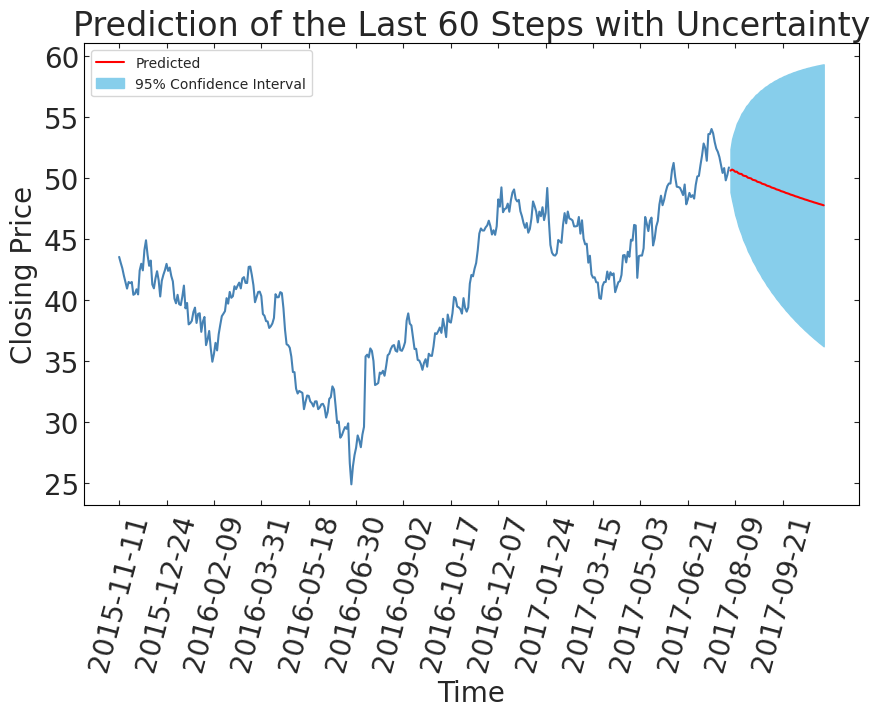

In [76]:
plt.plot(tss.iloc[:-60].index, tss.iloc[:-60][column_name])#, rot=75, lw=2)

forecast = model_fit.get_forecast(60)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

# Plot the predictions with uncertainty
plt.plot(tss.iloc[-60:].index, yhat, label="Predicted", color="red")
plt.fill_between(tss.iloc[-60:].index,  yhat_conf_int["lower " + column_name],
                 yhat_conf_int["upper " + column_name],
                 color="skyblue",
                 label="95% Confidence Interval")
plt.xticks(tss.index[::30], rotation=75)
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Prediction of the Last 60 Steps with Uncertainty")
plt.legend(fontsize=10)
plt.show()

**Fig. 5:** The closing price vs time for the stock aal.us. The data is shown as the solid blue line. The prediction using an ARIMA model is shown as the solid red line, with shaded blue around it denoting its 95% confidence interval. It is noted that the prediction is trending generally downwards with a concave-like shape, though the confidence interval points to the closing price potentially rising or falling further. It is noted, however, that there seems to be more potential of the closing price falling at a later time, as seen in the 95% confidence interval limit on the latest date.

In [77]:
column_name = "a.us"
N_test = 60
p = 4
i = 1
q = 3

print("information for a.us")
arma_model = sm.tsa.ARIMA(tss.iloc[:-60][column_name], order=(p, i, q))
model_fit = arma_model.fit()
model_fit.summary()


information for a.us


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   a.us   No. Observations:                  387
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -360.187
Date:                Tue, 04 Mar 2025   AIC                            736.374
Time:                        22:15:11   BIC                            768.021
Sample:                             0   HQIC                           748.924
                                - 387                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8283      0.172      4.805      0.000       0.490       1.166
ar.L2          0.6588      0.252      2.616      0.009       0.165       1.152
ar.L3         -0.5701      0.188     -3.030      0.002      -0.939      -0.201
ar.L4         -0.1556      0.051     -3.078      0.002      -0.255      -0.057
ma.L1         -0.9069      0.173     -5.241      0.000      -1.246      -0.568
ma.L2         -0.6098      0.244     -2.498      0.012      -1.088      -0.131
ma.L3          0.7113      0.175      4.068      0.000       0.369       1.054
sigma2         0.3783      0.020     18.593      0.000       0.338       0.418
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                90.11
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.50
Prob(H) (two-sided):                  0.29   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

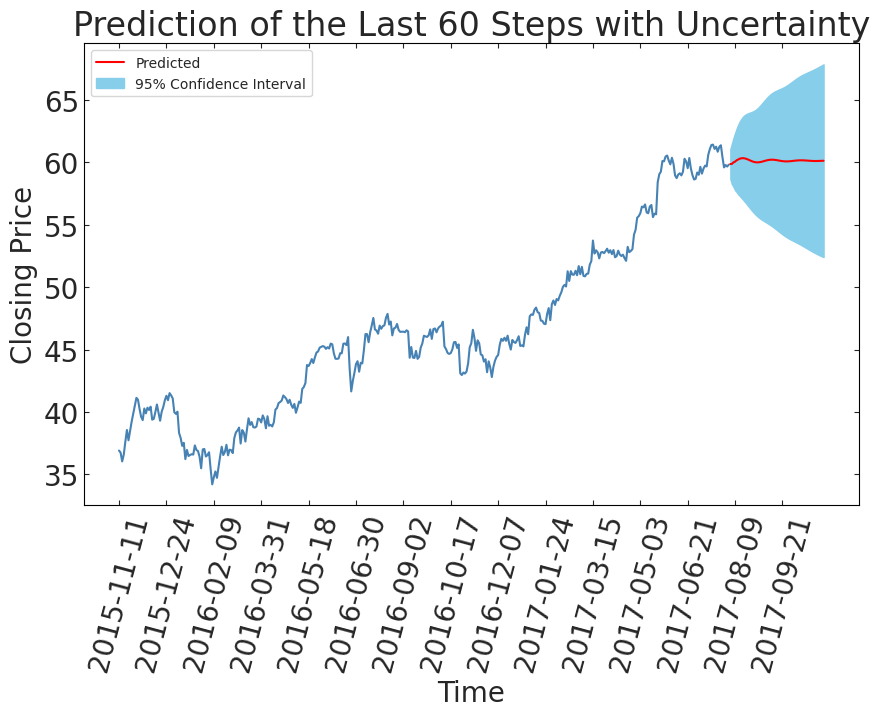

In [78]:
plt.plot(tss.iloc[:-60].index, tss.iloc[:-60][column_name])#, rot=75, lw=2)

forecast = model_fit.get_forecast(60)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

# Plot the predictions with uncertainty
plt.plot(tss.iloc[-60:].index, yhat, label="Predicted", color="red")
plt.fill_between(tss.iloc[-60:].index,  yhat_conf_int["lower " + column_name],
                 yhat_conf_int["upper " + column_name],
                 color="skyblue",
                 label="95% Confidence Interval")
plt.xticks(tss.index[::30], rotation=75)
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Prediction of the Last 60 Steps with Uncertainty")
plt.legend(fontsize=10)
plt.show()

**Fig. 6**: Historical closing prices (solid blue line) for the stock A.US, paired with an ARIMA model forecast (solid red line) and a shaded blue 95% confidence interval. The forecast exhibits a stable, nearly flat trajectory with minimal variation across the prediction period. The symmetrical confidence interval reflects balanced probabilities of upward or downward price movements, though neither boundary suggests significant deviation from the forecasted trend. Despite the model’s indication of stability, the absence of meaningful growth signals—combined with persistent uncertainty in price direction—implies limited potential for substantial returns. This neutral outlook positions A.US as a low-volatility but unremarkable investment option, warranting a cautious approach for investors seeking growth.

In [79]:
column_name = "aa.us"
N_test = 4
p = 7
i = 1
q = 3

print("information for aa.us")
arma_model = sm.tsa.ARIMA(tss.iloc[:-60][column_name], order=(p, i, q))
model_fit = arma_model.fit()
model_fit.summary()


information for aa.us


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  aa.us   No. Observations:                  387
Model:                 ARIMA(7, 1, 3)   Log Likelihood                -437.707
Date:                Tue, 04 Mar 2025   AIC                            897.414
Time:                        22:15:14   BIC                            940.929
Sample:                             0   HQIC                           914.671
                                - 387                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5949      0.074     -8.059      0.000      -0.740      -0.450
ar.L2          0.5518      0.085      6.499      0.000       0.385       0.718
ar.L3          1.0607      0.075     14.155      0.000       0.914       1.208
ar.L4          0.1447      0.064      2.253      0.024       0.019       0.270
ar.L5          0.0022      0.066      0.034      0.973      -0.127       0.131
ar.L6         -0.1413      0.052     -2.735      0.006      -0.243      -0.040
ar.L7         -0.0967      0.054     -1.793      0.073      -0.202       0.009
ma.L1          0.6063      0.057     10.558      0.000       0.494       0.719
ma.L2         -0.5813      0.069     -8.471      0.000      -0.716      -0.447
ma.L3         -0.9697      0.059    -16.562      0.000      -1.084      -0.855
sigma2         0.5630      0.035     16.213      0.000       0.495       0.631
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                80.03
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

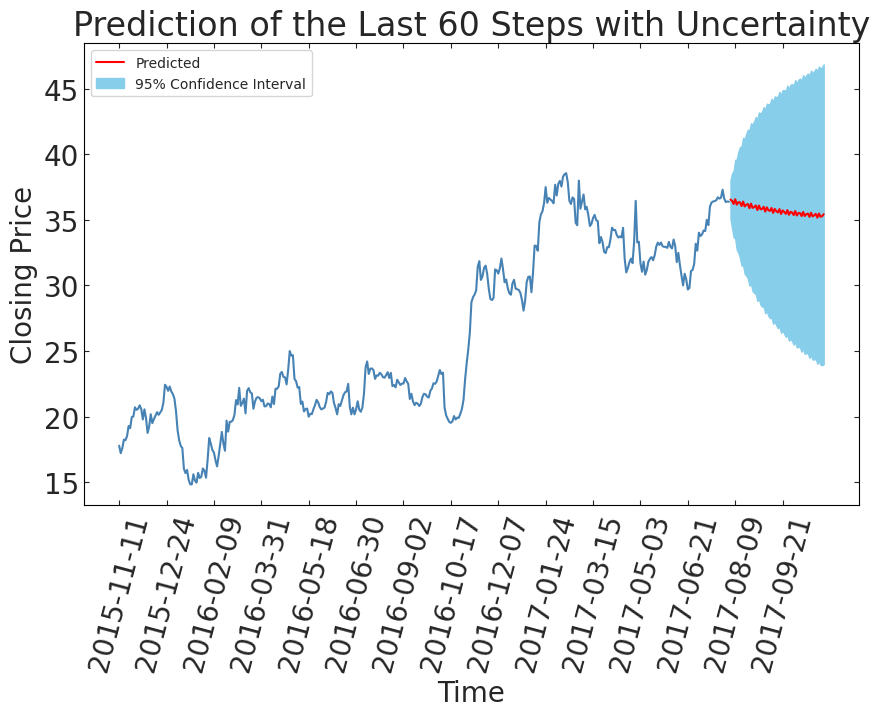

In [80]:
plt.plot(tss.iloc[:-60].index, tss.iloc[:-60][column_name])#, rot=75, lw=2)

forecast = model_fit.get_forecast(60)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

# Plot the predictions with uncertainty
plt.plot(tss.iloc[-60:].index, yhat, label="Predicted", color="red")
plt.fill_between(tss.iloc[-60:].index,  yhat_conf_int["lower " + column_name],
                 yhat_conf_int["upper " + column_name],
                 color="skyblue",
                 label="95% Confidence Interval")
plt.xticks(tss.index[::30], rotation=75)
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Prediction of the Last 60 Steps with Uncertainty")
plt.legend(fontsize=10)
plt.show()

**Fig. 7**: Historical closing prices (solid blue line) for the stock AA.US, with an ARIMA model forecast (solid red line) and a shaded blue 95% confidence interval. The forecast shows a minor downward drift over time but remains confined to a tight range of ~2–3 units from the starting price throughout the prediction window. The confidence interval is symmetrical, reflecting balanced probabilities of upward or downward price movements. Notably, even the upper boundary of the interval does not approach the stock’s historical peak values observed earlier in the dataset. This muted forecast, coupled with persistent uncertainty and a lack of upward momentum, suggests limited potential for significant gains, positioning AA.US as a speculative and high-risk investment.

In [81]:
column_name = "aaap.us"
N_test = 60
p = 6
i = 1
q = 3

print("information for aaap.us")
arma_model = sm.tsa.ARIMA(tss.iloc[:-60][column_name], order=(p, i, q))
model_fit = arma_model.fit()
model_fit.summary()


information for aaap.us


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                aaap.us   No. Observations:                  387
Model:                 ARIMA(6, 1, 3)   Log Likelihood                -525.667
Date:                Tue, 04 Mar 2025   AIC                           1071.333
Time:                        22:15:15   BIC                           1110.892
Sample:                             0   HQIC                          1087.021
                                - 387                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5891      0.330     -1.785      0.074      -1.236       0.058
ar.L2          0.6048      0.446      1.357      0.175      -0.269       1.479
ar.L3          0.7435      0.277      2.680      0.007       0.200       1.287
ar.L4          0.0469      0.077      0.608      0.543      -0.104       0.198
ar.L5         -0.0606      0.107     -0.569      0.569      -0.269       0.148
ar.L6          0.0012      0.074      0.016      0.988      -0.144       0.146
ma.L1          0.6048      0.327      1.849      0.064      -0.036       1.246
ma.L2         -0.5721      0.444     -1.290      0.197      -1.441       0.297
ma.L3         -0.6791      0.279     -2.434      0.015      -1.226      -0.132
sigma2         0.8918      0.035     25.381      0.000       0.823       0.961
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               764.14
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

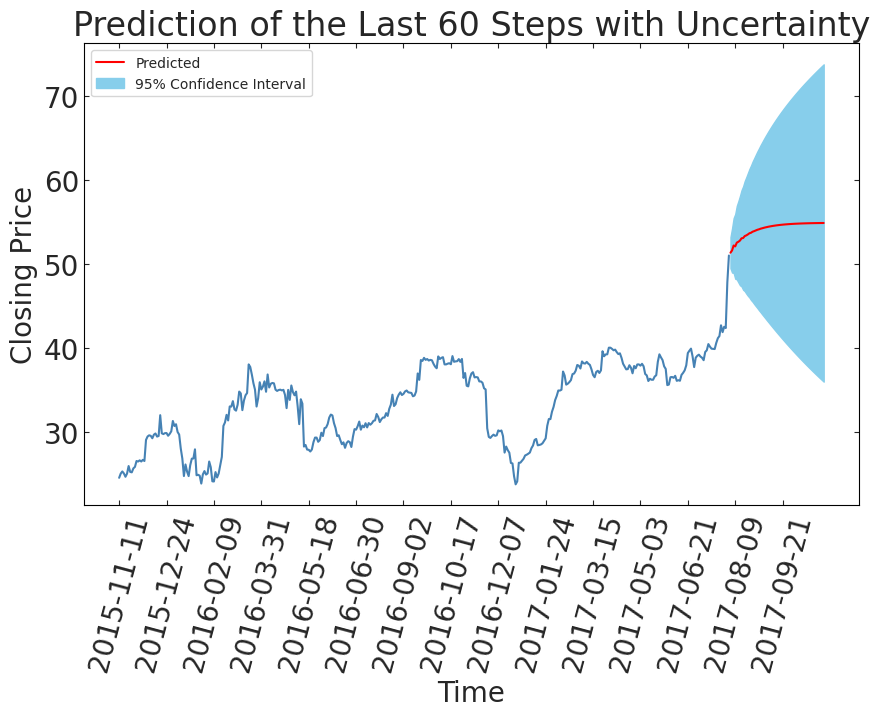

In [82]:
plt.plot(tss.iloc[:-60].index, tss.iloc[:-60][column_name])#, rot=75, lw=2)

forecast = model_fit.get_forecast(60)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

# Plot the predictions with uncertainty
plt.plot(tss.iloc[-60:].index, yhat, label="Predicted", color="red")
plt.fill_between(tss.iloc[-60:].index,  yhat_conf_int["lower " + column_name],
                 yhat_conf_int["upper " + column_name],
                 color="skyblue",
                 label="95% Confidence Interval")
plt.xticks(tss.index[::30], rotation=75)
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Prediction of the Last 60 Steps with Uncertainty")
plt.legend(fontsize=10)
plt.show()

**Fig. 8**: The closing price vs time for the stock aaap.us. The data is shown as the solid blue line. The prediction using an ARIMA model is shown as the solid red line, with shaded blue around it denoting its 95% confidence interval. It is noted that the prediction increases logarithmically increases and flattens out the later the time goes. The confidence interval points to the closing price potentially rising or falling further, with the interval being a little larger for the price rising – potentially a stock to invest into!  

In [83]:
column_name = "aaba.us"
N_test = 60
p = 6
i = 1
q = 3

print("information for aaba.us")
arma_model = sm.tsa.ARIMA(tss.iloc[:-60][column_name], order=(p, i, q))
model_fit = arma_model.fit()
model_fit.summary()


information for aaba.us


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                aaba.us   No. Observations:                  387
Model:                 ARIMA(6, 1, 3)   Log Likelihood                -396.573
Date:                Tue, 04 Mar 2025   AIC                            813.146
Time:                        22:15:17   BIC                            852.705
Sample:                             0   HQIC                           828.834
                                - 387                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3651      0.138      2.655      0.008       0.096       0.635
ar.L2         -0.5027      0.168     -2.996      0.003      -0.831      -0.174
ar.L3          0.6747      0.128      5.251      0.000       0.423       0.927
ar.L4          0.2338      0.062      3.766      0.000       0.112       0.356
ar.L5         -0.0402      0.060     -0.669      0.504      -0.158       0.078
ar.L6          0.1370      0.067      2.033      0.042       0.005       0.269
ma.L1         -0.5284      0.138     -3.816      0.000      -0.800      -0.257
ma.L2          0.5435      0.162      3.362      0.001       0.227       0.860
ma.L3         -0.8384      0.121     -6.946      0.000      -1.075      -0.602
sigma2         0.4566      0.018     26.087      0.000       0.422       0.491
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1223.01
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.86
Prob(H) (two-sided):                  0.76   Kurtosis:                        11.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

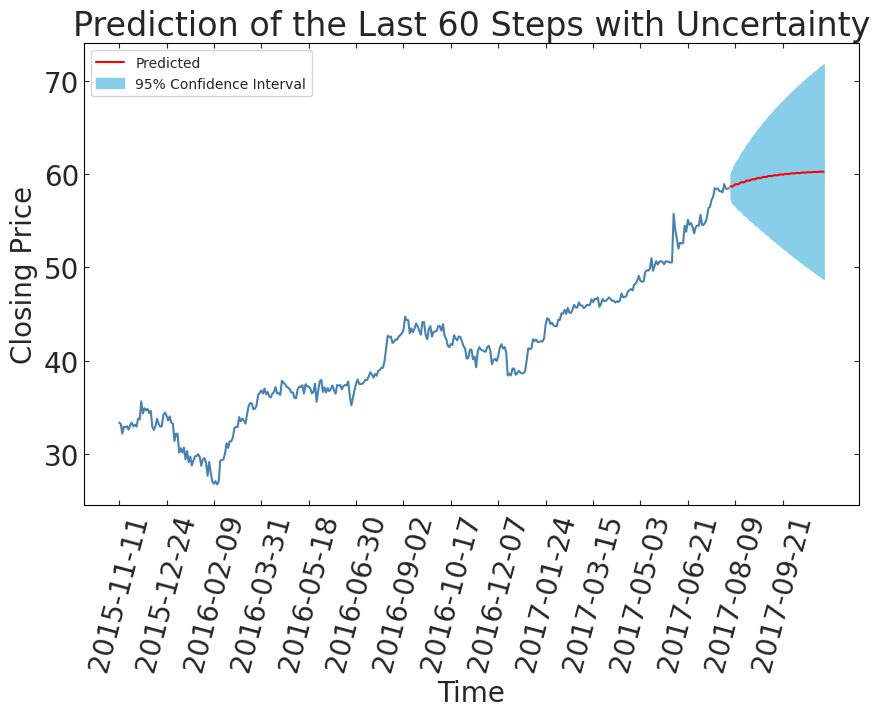

In [84]:
plt.plot(tss.iloc[:-60].index, tss.iloc[:-60][column_name])#, rot=75, lw=2)

forecast = model_fit.get_forecast(60)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

# Plot the predictions with uncertainty
plt.plot(tss.iloc[-60:].index, yhat, label="Predicted", color="red")
plt.fill_between(tss.iloc[-60:].index,  yhat_conf_int["lower " + column_name],
                 yhat_conf_int["upper " + column_name],
                 color="skyblue",
                 label="95% Confidence Interval")
plt.xticks(tss.index[::30], rotation=75)
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Prediction of the Last 60 Steps with Uncertainty")
plt.legend(fontsize=10)
plt.show()

**Fig. 9**: The closing price vs time for the stock aaba.us. The data is shown as the solid blue line. The prediction using an ARIMA model is shown as the solid red line, with shaded blue around it denoting its 95% confidence interval. It is noted that the prediction increases increases slightly with time and goes up ~2-3 units in closing price. The confidence interval points to the closing price potentially rising or falling further, with both being relatively equal in interval. A potentially “ok” stock to invest in.  

In [85]:
column_name = "aac.us"
N_test = 60
p = 7
i = 1
q = 3

print("information for aac.us")
arma_model = sm.tsa.ARIMA(tss.iloc[:-60][column_name], order=(p, i, q))
model_fit = arma_model.fit()
model_fit.summary()


information for aac.us


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 aac.us   No. Observations:                  387
Model:                 ARIMA(7, 1, 3)   Log Likelihood                -400.623
Date:                Tue, 04 Mar 2025   AIC                            823.245
Time:                        22:15:22   BIC                            866.759
Sample:                             0   HQIC                           840.501
                                - 387                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2437     28.838      0.008      0.993     -56.279      56.766
ar.L2          0.6647      4.631      0.144      0.886      -8.412       9.742
ar.L3         -0.2697     17.875     -0.015      0.988     -35.304      34.764
ar.L4          0.0299      0.688      0.043      0.965      -1.318       1.378
ar.L5         -0.0980      0.590     -0.166      0.868      -1.254       1.058
ar.L6         -0.0391      2.623     -0.015      0.988      -5.181       5.103
ar.L7          0.0265      2.215      0.012      0.990      -4.316       4.369
ma.L1         -0.2118     28.842     -0.007      0.994     -56.742      56.318
ma.L2         -0.6523      5.551     -0.117      0.906     -11.533      10.228
ma.L3          0.2366     17.143      0.014      0.989     -33.364      33.837
sigma2         0.4665      0.013     35.866      0.000       0.441       0.492
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             53150.55
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                            -4.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        59.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

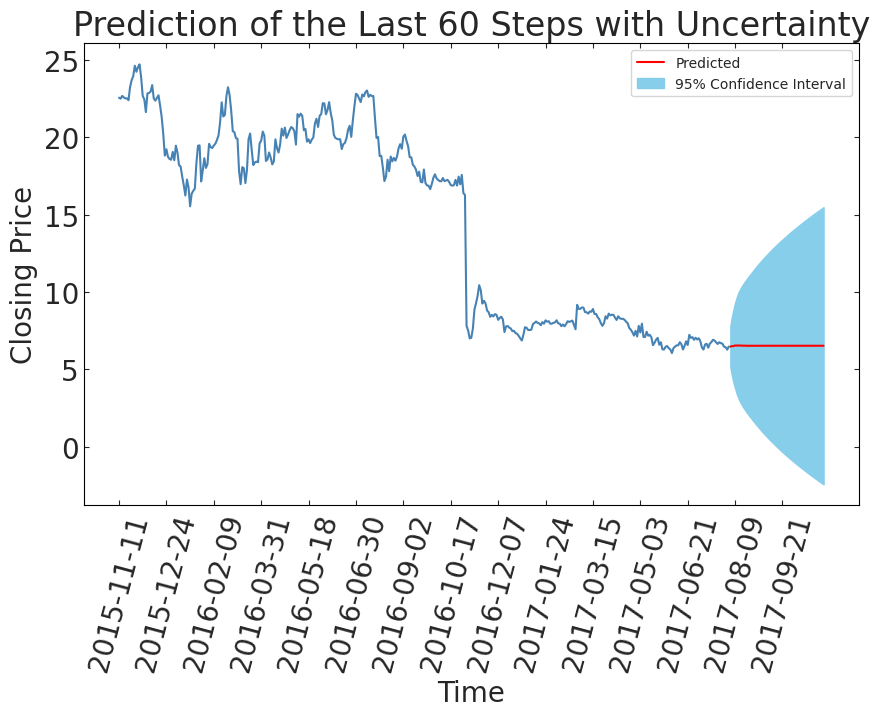

In [86]:
plt.plot(tss.iloc[:-60].index, tss.iloc[:-60][column_name])#, rot=75, lw=2)

forecast = model_fit.get_forecast(60)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

# Plot the predictions with uncertainty
plt.plot(tss.iloc[-60:].index, yhat, label="Predicted", color="red")
plt.fill_between(tss.iloc[-60:].index,  yhat_conf_int["lower " + column_name],
                 yhat_conf_int["upper " + column_name],
                 color="skyblue",
                 label="95% Confidence Interval")
plt.xticks(tss.index[::30], rotation=75)
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Prediction of the Last 60 Steps with Uncertainty")
plt.legend(fontsize=10)
plt.show()

**Fig. 10**: Historical closing prices (solid blue line) for the stock AAC.US, paired with an ARIMA model forecast (solid red line) and a shaded blue 95% confidence interval. The forecast maintains a neutral, flat trajectory across the entire prediction period, contrasting with earlier peaks seen in the historical data. The confidence interval remains symmetric, suggesting balanced probabilities of upward or downward price movements. Notably, even the upper bound of the confidence interval fails to approach the stock’s previous peak values observed in the historical trend. This combination of stagnant forecasts, unresolved divergence from past highs, and persistent price uncertainty underscores limited upside potential, positioning AAC.US as a high-risk, low-reward investment option.

In [87]:
column_name = "aamc.us"
N_test = 60
p = 4
i = 1
q = 3

print("information for aamc.us")
arma_model = sm.tsa.ARIMA(tss.iloc[:-60][column_name], order=(p, i, q))
model_fit = arma_model.fit()
model_fit.summary()


information for aamc.us


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                aamc.us   No. Observations:                  387
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -900.778
Date:                Tue, 04 Mar 2025   AIC                           1817.556
Time:                        22:15:23   BIC                           1849.202
Sample:                             0   HQIC                          1830.106
                                - 387                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7405      2.263     -0.327      0.743      -5.175       3.694
ar.L2          0.8275      3.887      0.213      0.831      -6.792       8.447
ar.L3          0.8134      1.908      0.426      0.670      -2.926       4.552
ar.L4         -0.0034      0.047     -0.073      0.942      -0.096       0.089
ma.L1          0.8159      2.264      0.360      0.719      -3.621       5.253
ma.L2         -0.8153      4.048     -0.201      0.840      -8.750       7.119
ma.L3         -0.8937      2.082     -0.429      0.668      -4.974       3.186
sigma2         6.2255      0.218     28.597      0.000       5.799       6.652
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1321.76
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               5.77   Skew:                             1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

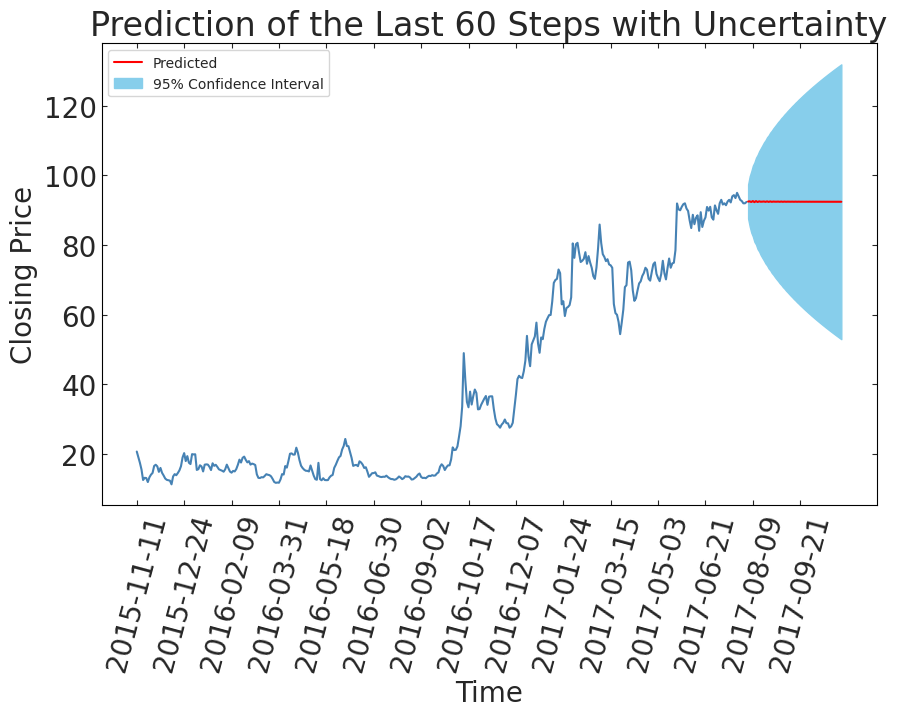

In [88]:
plt.plot(tss.iloc[:-60].index, tss.iloc[:-60][column_name])#, rot=75, lw=2)

forecast = model_fit.get_forecast(60)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

# Plot the predictions with uncertainty
plt.plot(tss.iloc[-60:].index, yhat, label="Predicted", color="red")
plt.fill_between(tss.iloc[-60:].index,  yhat_conf_int["lower " + column_name],
                 yhat_conf_int["upper " + column_name],
                 color="skyblue",
                 label="95% Confidence Interval")
plt.xticks(tss.index[::30], rotation=75)
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Prediction of the Last 60 Steps with Uncertainty")
plt.legend(fontsize=10)
plt.show()

**Fig. 11**: Historical closing prices (solid blue line) for the stock AAMC.US, alongside an ARIMA model forecast (solid red line) with a shaded blue 95% confidence interval. The forecast projects a stable, neutral trajectory throughout the prediction window, diverging from the upward trend observed in the months preceding the forecast period. The symmetrical confidence interval indicates balanced probabilities of price increases or decreases, with no clear bias toward growth or decline. While the model suggests stability, the lack of alignment with recent bullish momentum and persistent uncertainty in price direction signal limited confidence in meaningful returns, making this stock a cautious prospect for investors.

In [89]:
column_name = "aame.us"
N_test = 60
p = 2
i = 0
q = 3

# print("information for aame.us")
arma_model = sm.tsa.ARIMA(tss.iloc[:-60][column_name], order=(p, i, q))
model_fit = arma_model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  387
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 249.324
Date:                Tue, 04 Mar 2025   AIC                           -484.647
Time:                        22:15:24   BIC                           -456.938
Sample:                             0   HQIC                          -473.660
                                - 387                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9933      0.176     22.628      0.000       3.647       4.339
ar.L1          0.1910      1.788      0.107      0.915      -3.314       3.696
ar.L2          0.7670      1.748      0.439      0.661      -2.659       4.193
ma.L1          0.5235      1.789      0.293      0.770      -2.983       4.030
ma.L2         -0.2082      0.469     -0.444      0.657      -1.128       0.712
ma.L3          0.0059      0.057      0.104      0.917      -0.106       0.118
sigma2         0.0160      0.001     18.980      0.000       0.014       0.018
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                72.88
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

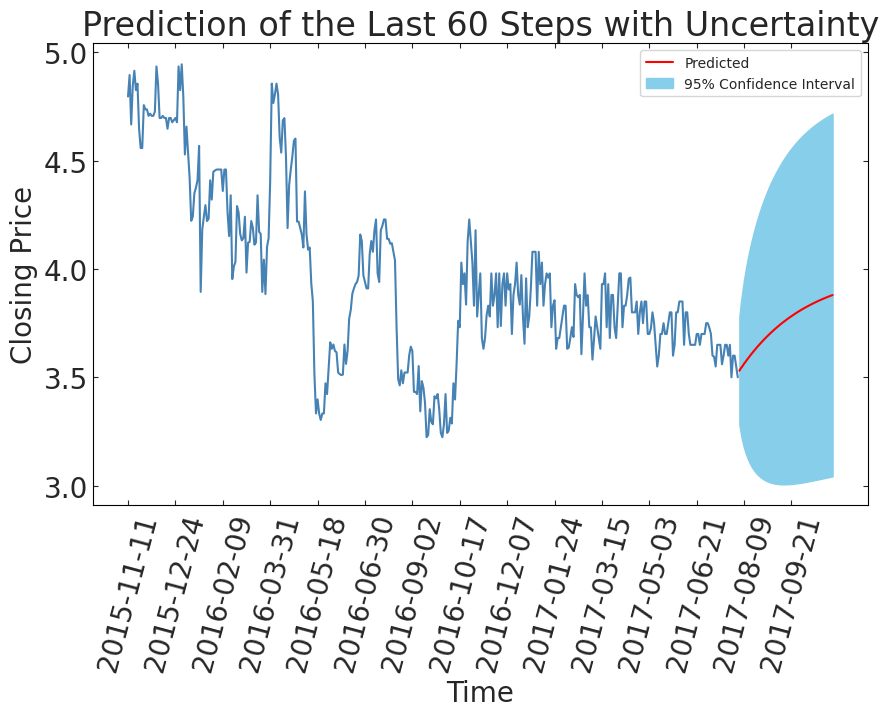

In [90]:
plt.plot(tss.iloc[:-60].index, tss.iloc[:-60][column_name])#, rot=75, lw=2)

forecast = model_fit.get_forecast(60)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

# Plot the predictions with uncertainty
plt.plot(tss.iloc[-60:].index, yhat, label="Predicted", color="red")
plt.fill_between(tss.iloc[-60:].index,  yhat_conf_int["lower " + column_name],
                 yhat_conf_int["upper " + column_name],
                 color="skyblue",
                 label="95% Confidence Interval")
plt.xticks(tss.index[::30], rotation=75)
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Prediction of the Last 60 Steps with Uncertainty")
plt.legend(fontsize=10)
plt.show()

**Fig. 12**: Historical closing prices (solid blue line) and ARIMA model forecasts (solid red line) for the stock AAME.US, accompanied by a shaded blue 95% confidence interval. The forecast indicates gradual growth compared to the stock’s performance in the months preceding the prediction window. However, the confidence interval reveals heightened downside risk at the start of the forecast period, with prices more likely to decline than rise initially. While the model projects an upward trend, the early-phase volatility and asymmetric risk profile suggest cautious optimism. Investors may consider this a speculative opportunity with potential upside, albeit requiring close monitoring of near-term fluctuations.

In [91]:
column_name = "aan.us"
N_test = 60
p = 6
i = 1
q = 3

print("information for aan.us")
arma_model = sm.tsa.ARIMA(tss.iloc[:-60][column_name], order=(p, i, q))
model_fit = arma_model.fit()
model_fit.summary()


information for aan.us


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 aan.us   No. Observations:                  387
Model:                 ARIMA(6, 1, 3)   Log Likelihood                -407.077
Date:                Tue, 04 Mar 2025   AIC                            834.153
Time:                        22:15:26   BIC                            873.712
Sample:                             0   HQIC                           849.841
                                - 387                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3445      0.973     -0.354      0.723      -2.251       1.562
ar.L2         -0.5755      0.469     -1.227      0.220      -1.495       0.344
ar.L3         -0.6455      0.802     -0.805      0.421      -2.217       0.926
ar.L4          0.0369      0.080      0.459      0.646      -0.121       0.195
ar.L5         -0.0141      0.085     -0.166      0.868      -0.181       0.153
ar.L6          0.0226      0.079      0.285      0.775      -0.132       0.178
ma.L1          0.3155      0.983      0.321      0.748      -1.610       2.241
ma.L2          0.5393      0.474      1.139      0.255      -0.389       1.468
ma.L3          0.6744      0.799      0.844      0.399      -0.892       2.241
sigma2         0.4815      0.015     31.969      0.000       0.452       0.511
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4742.68
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.35   Skew:                             1.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

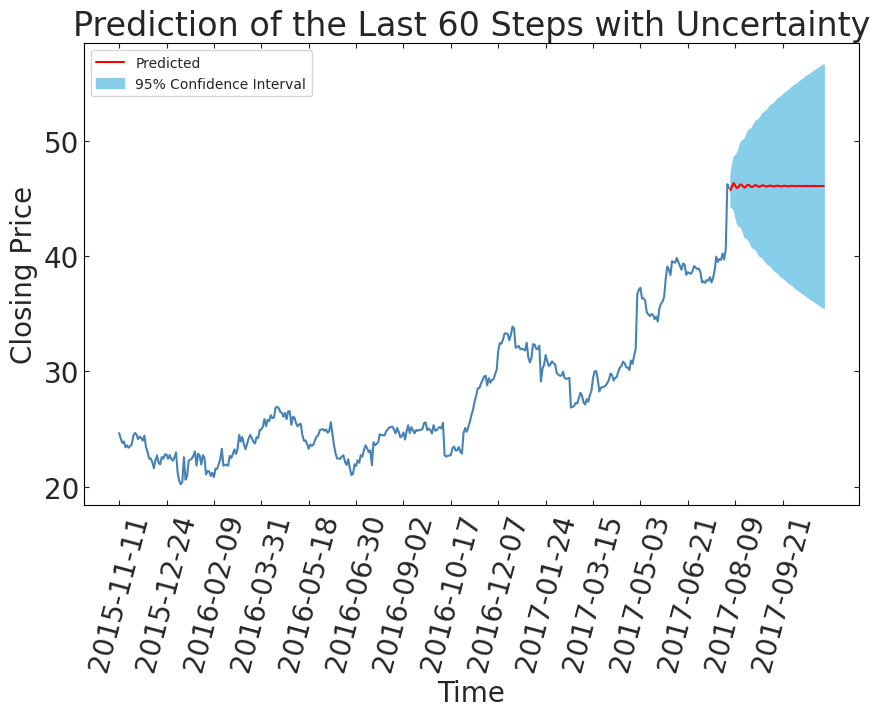

In [92]:
plt.plot(tss.iloc[:-60].index, tss.iloc[:-60][column_name])#, rot=75, lw=2)

forecast = model_fit.get_forecast(60)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

# Plot the predictions with uncertainty
plt.plot(tss.iloc[-60:].index, yhat, label="Predicted", color="red")
plt.fill_between(tss.iloc[-60:].index,  yhat_conf_int["lower " + column_name],
                 yhat_conf_int["upper " + column_name],
                 color="skyblue",
                 label="95% Confidence Interval")
plt.xticks(tss.index[::30], rotation=75)
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Prediction of the Last 60 Steps with Uncertainty")
plt.legend(fontsize=10)
plt.show()

**Fig. 13**: Historical closing prices (solid blue line) and ARIMA model forecasts (solid red line) for the stock AAN.US, with a shaded blue region representing the 95% confidence interval. The forecast maintains a relatively stable, neutral trend throughout the predicted period, showing no significant directional movement. The confidence interval remains symmetrical, suggesting comparable probabilities of upward or downward price deviations. While the model indicates stability, the absence of meaningful growth signals—combined with persistent uncertainty in price direction—implies limited potential for profitable returns, making this stock a cautious choice for investors.

In [93]:
column_name = "aaoi.us"
N_test = 60
p = 18
i = 1
q = 3

print("information for aaoi.us")
arma_model = sm.tsa.ARIMA(tss.iloc[:-60][column_name], order=(p, i, q))
model_fit = arma_model.fit()
model_fit.summary()


information for aaoi.us


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                aaoi.us   No. Observations:                  387
Model:                ARIMA(18, 1, 3)   Log Likelihood                -731.687
Date:                Tue, 04 Mar 2025   AIC                           1507.374
Time:                        22:15:30   BIC                           1594.403
Sample:                             0   HQIC                          1541.887
                                - 387                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4737      0.142     -3.330      0.001      -0.752      -0.195
ar.L2          0.5296      0.124      4.266      0.000       0.286       0.773
ar.L3          0.5111      0.123      4.157      0.000       0.270       0.752
ar.L4          0.1338      0.056      2.394      0.017       0.024       0.243
ar.L5         -0.0275      0.069     -0.399      0.690      -0.162       0.107
ar.L6         -0.0474      0.068     -0.702      0.483      -0.180       0.085
ar.L7          0.0424      0.043      0.987      0.324      -0.042       0.127
ar.L8          0.0093      0.060      0.155      0.876      -0.108       0.127
ar.L9         -0.0913      0.074     -1.239      0.215      -0.236       0.053
ar.L10        -0.1203      0.058     -2.083      0.037      -0.233      -0.007
ar.L11         0.0051      0.056      0.092      0.927      -0.105       0.115
ar.L12         0.0402      0.061      0.664      0.507      -0.078       0.159
ar.L13         0.0350      0.058      0.604      0.546      -0.079       0.149
ar.L14         0.0679      0.052      1.297      0.194      -0.035       0.170
ar.L15         0.0551      0.064      0.860      0.390      -0.071       0.181
ar.L16         0.0969      0.058      1.668      0.095      -0.017       0.211
ar.L17        -0.1089      0.058     -1.891      0.059      -0.222       0.004
ar.L18        -0.2757      0.040     -6.824      0.000      -0.355      -0.197
ma.L1          0.4869      0.150      3.249      0.001       0.193       0.781
ma.L2         -0.4444      0.134     -3.315      0.001      -0.707      -0.182
ma.L3         -0.3913      0.128     -3.056      0.002      -0.642      -0.140
sigma2         2.5812      0.102     25.424      0.000       2.382       2.780
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              1054.93
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):              14.37   Skew:                             1.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

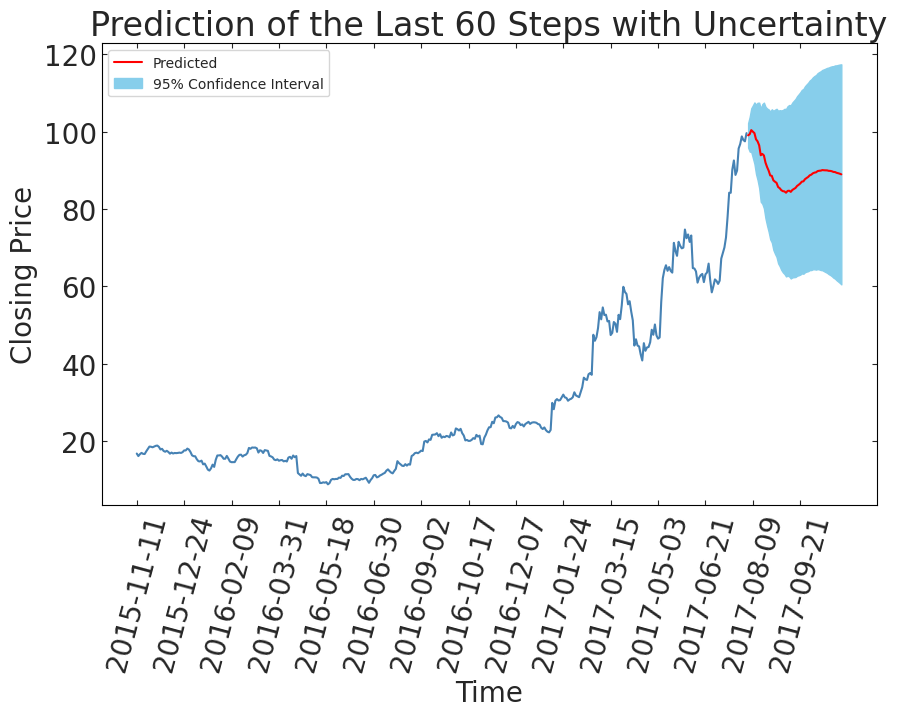

In [94]:
plt.plot(tss.iloc[:-60].index, tss.iloc[:-60][column_name])#, rot=75, lw=2)

forecast = model_fit.get_forecast(60)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

# Plot the predictions with uncertainty
plt.plot(tss.iloc[-60:].index, yhat, label="Predicted", color="red")
plt.fill_between(tss.iloc[-60:].index,  yhat_conf_int["lower " + column_name],
                 yhat_conf_int["upper " + column_name],
                 color="skyblue",
                 label="95% Confidence Interval")
plt.xticks(tss.index[::30], rotation=75)
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Prediction of the Last 60 Steps with Uncertainty")
plt.legend(fontsize=10)
plt.show()


**Fig. 14**: Closing price over time for the stock AAOI.US (solid blue line) alongside an ARIMA model forecast (solid red line), with a shaded blue region indicating the 95% confidence interval. The forecast exhibits an overall downward trajectory, declining sharply in the initial phase of the prediction, followed by a brief partial recovery, and then another decrease toward the end. The asymmetric confidence interval widens more prominently on the lower side, signaling heightened risk of further price declines compared to potential gains. Given the persistent downward pressure and limited upside indicated by the model, this stock appears to carry significant risk and is unlikely to yield profitable returns for investors.

In [95]:
column_name = "aaon.us"
N_test = 60
p = 17
i = 1
q = 3

print("information for aaon.us")
arma_model = sm.tsa.ARIMA(tss.iloc[:-60][column_name], order=(p, i, q))
model_fit = arma_model.fit()
model_fit.summary()


information for aaon.us


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                aaon.us   No. Observations:                  387
Model:                ARIMA(17, 1, 3)   Log Likelihood                -294.963
Date:                Tue, 04 Mar 2025   AIC                            631.926
Time:                        22:15:41   BIC                            714.999
Sample:                             0   HQIC                           664.870
                                - 387                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0864      0.394      0.219      0.826      -0.685       0.858
ar.L2         -0.2539      0.321     -0.790      0.429      -0.883       0.376
ar.L3          0.8621      0.397      2.170      0.030       0.084       1.641
ar.L4         -0.0389      0.081     -0.480      0.631      -0.198       0.120
ar.L5         -0.0345      0.081     -0.428      0.669      -0.192       0.123
ar.L6         -0.0458      0.076     -0.601      0.548      -0.195       0.103
ar.L7         -0.0070      0.094     -0.075      0.940      -0.191       0.177
ar.L8          0.0023      0.089      0.026      0.980      -0.173       0.177
ar.L9          0.0254      0.091      0.280      0.780      -0.152       0.203
ar.L10         0.0221      0.081      0.274      0.784      -0.136       0.180
ar.L11         0.0519      0.081      0.640      0.522      -0.107       0.211
ar.L12        -0.0290      0.080     -0.361      0.718      -0.186       0.128
ar.L13        -0.0435      0.087     -0.501      0.616      -0.213       0.127
ar.L14        -0.0360      0.075     -0.477      0.633      -0.184       0.112
ar.L15        -0.0041      0.066     -0.062      0.951      -0.133       0.125
ar.L16         0.0219      0.066      0.333      0.739      -0.107       0.151
ar.L17         0.0737      0.061      1.209      0.227      -0.046       0.193
ma.L1         -0.1007      0.397     -0.254      0.800      -0.878       0.677
ma.L2          0.2710      0.320      0.848      0.396      -0.355       0.897
ma.L3         -0.8671      0.392     -2.213      0.027      -1.635      -0.099
sigma2         0.2684      0.013     20.819      0.000       0.243       0.294
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               236.41
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.52
Prob(H) (two-sided):                  0.65   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

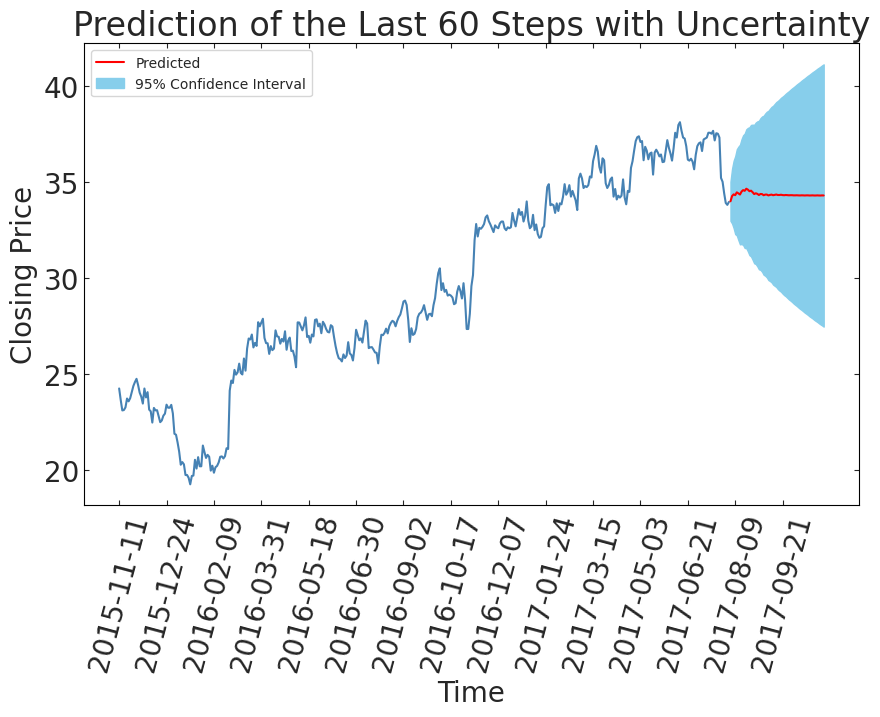

In [96]:
plt.plot(tss.iloc[:-60].index, tss.iloc[:-60][column_name])#, rot=75, lw=2)

forecast = model_fit.get_forecast(60)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

# Plot the predictions with uncertainty
plt.plot(tss.iloc[-60:].index, yhat, label="Predicted", color="red")
plt.fill_between(tss.iloc[-60:].index,  yhat_conf_int["lower " + column_name],
                 yhat_conf_int["upper " + column_name],
                 color="skyblue",
                 label="95% Confidence Interval")
plt.xticks(tss.index[::30], rotation=75)
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Prediction of the Last 60 Steps with Uncertainty")
plt.legend(fontsize=10)
plt.show()

**Fig. 15**: The closing price vs time for the stock aaon.

---

The solid blue line represents the historical data, while the ARIMA model’s forecast is depicted as a solid red line, accompanied by a shaded blue 95% confidence interval. The forecast initially shows a modest upward trend but quickly declines and stabilizes near the end of the prediction window. The confidence interval remains relatively symmetrical, suggesting similar probabilities of upward or downward price movements. Notably, the predicted values largely remain below the historical peak observed in the actual data. Given this analysis, the stock appears to carry significant uncertainty with limited upside potential, making it a less compelling investment option.